# Homework. Recommendation System

<div style='background-color: lightblue; padding: 10px; border-radius: 10px;'>
    <h4 style='color: darkblue;'> Dataset</h4>
</div>

Архив spotify_dataset.zip содержит несколько связанных таблиц с данными о песнях из Spotify, структурированных по разным аспектам:
 - data.csv — общие данные о треках.
 - data_by_artist.csv — агрегированные данные по артистам.
 - data_by_genres.csv — агрегированные данные по жанрам.
 - data_by_year.csv — агрегированные данные по годам.
 - data_w_genres.csv — данные с указанием жанров.

In [1]:
import pandas as pd
import ast

In [2]:
dir_path = 'HW/data/'
data_path = 'data.csv'
artist_path = 'data_by_artist.csv'
genres_path = 'data_by_genres.csv'
year_path = 'data_by_year.csv'
wgenres_path = 'data_w_genres.csv'

Рассмотрим сожержимое архива подробнее:

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> data_by_artist.csv</h4>
</div>

In [3]:
artist_df = pd.read_csv(dir_path + artist_path)

In [4]:
artist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [5]:
len(artist_df[artist_df.duplicated()])

0

In [6]:
artist_df['artists'].nunique()

28680

In [7]:
artist_df.head().T

,0,1,2,3,4
mode,1,1,1,1,1
count,9,26,7,27,7
acousticness,0.590111,0.862538,0.856571,0.884926,0.510714
artists,"""Cats"" 1981 Original London Cast","""Cats"" 1983 Broadway Cast","""Fiddler On The Roof” Motion Picture Chorus","""Fiddler On The Roof” Motion Picture Orchestra","""Joseph And The Amazing Technicolor Dreamcoat""..."
danceability,0.467222,0.441731,0.348286,0.425074,0.467143
duration_ms,250318.555556,287280.0,328920.0,262890.962963,270436.142857
energy,0.394003,0.406808,0.286571,0.24577,0.488286
instrumentalness,0.0114,0.081158,0.024593,0.073587,0.0094
liveness,0.290833,0.315215,0.325786,0.275481,0.195
loudness,-14.448,-10.69,-15.230714,-15.63937,-10.236714


У нас 28680 записи и нет дубликатов, все имена исполнителей уникальны. Данные содержат следующие столбцы:
 - artists: имя артиста 
 - count: количество треков артиста в выборке
 - acousticness: акустичность (0–1)
 - danceability: танцевальность (0–1)
 - duration_ms: средняя длительность трека в миллисекундах
 - energy: энергичность (0–1)
 - instrumentalness: инструментальность (0–1)
 - liveness: живость (0–1)
 - loudness: средняя громкость (в dB)
 - speechiness: наличие речи (0–1)
 - tempo: темп в BPM
 - valence: эмоциональная окраска (предположительно: 0 – грусть, 1 – радость)
 - popularity: средняя популярность
 - mode: скорее всего - мажор (1) или минор (0)
 - key: тональность (скорее всего 0 = C, 1 = C#, …, 11 = B)

Видим, что файл содержит усреднённые аудио характеристики и популярность по артистам. Посмотрим на топ-10 самых популярных исполнителей.

In [8]:
artist_df[['artists', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

,artists,popularity
20966,Ritt Momney,93.0
14354,Lele Pons,92.0
15070,Los Legendarios,90.0
11764,Jerry Di,89.0
28263,salem ilese,88.0
23687,Surf Mesa,88.0
7463,Emilee,88.0
213,A7S,87.0
26318,Towy,86.0
16453,Master KG,86.0


<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> data_by_artist.csv. Distributions</h4>
</div>

In [9]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

Визуализируем распределения и основны статистики числовых признаков.

In [11]:
numeric_features = [
    'popularity', 'count', 'duration_ms', 'acousticness', 'danceability',
    'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
    'tempo', 'valence']

In [12]:
def plot_distr(df: pd.DataFrame, features) -> None:
    """
    Plot distribution histograms with KDE for multiple numerical features in a DataFrame.

    Parameters:
        df : pd.DataFrame
            The DataFrame containing the data to plot.
    
        features : List[str]
            A list of column names (strings) corresponding to numerical features in the DataFrame df.

    Returns:
        None
            Displays a grid of histograms with KDE plots for the specified features.
    """
    plt.figure(figsize=(16, 20))
    for i, feature in enumerate(features, 1):
        plt.subplot(int(len(features) / 2 + len(features) % 2), 2, i)
        sns.histplot(df[feature], kde=True, bins=50)
        plt.title(f'Distribution: {feature}')
        plt.xlabel('')
        plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

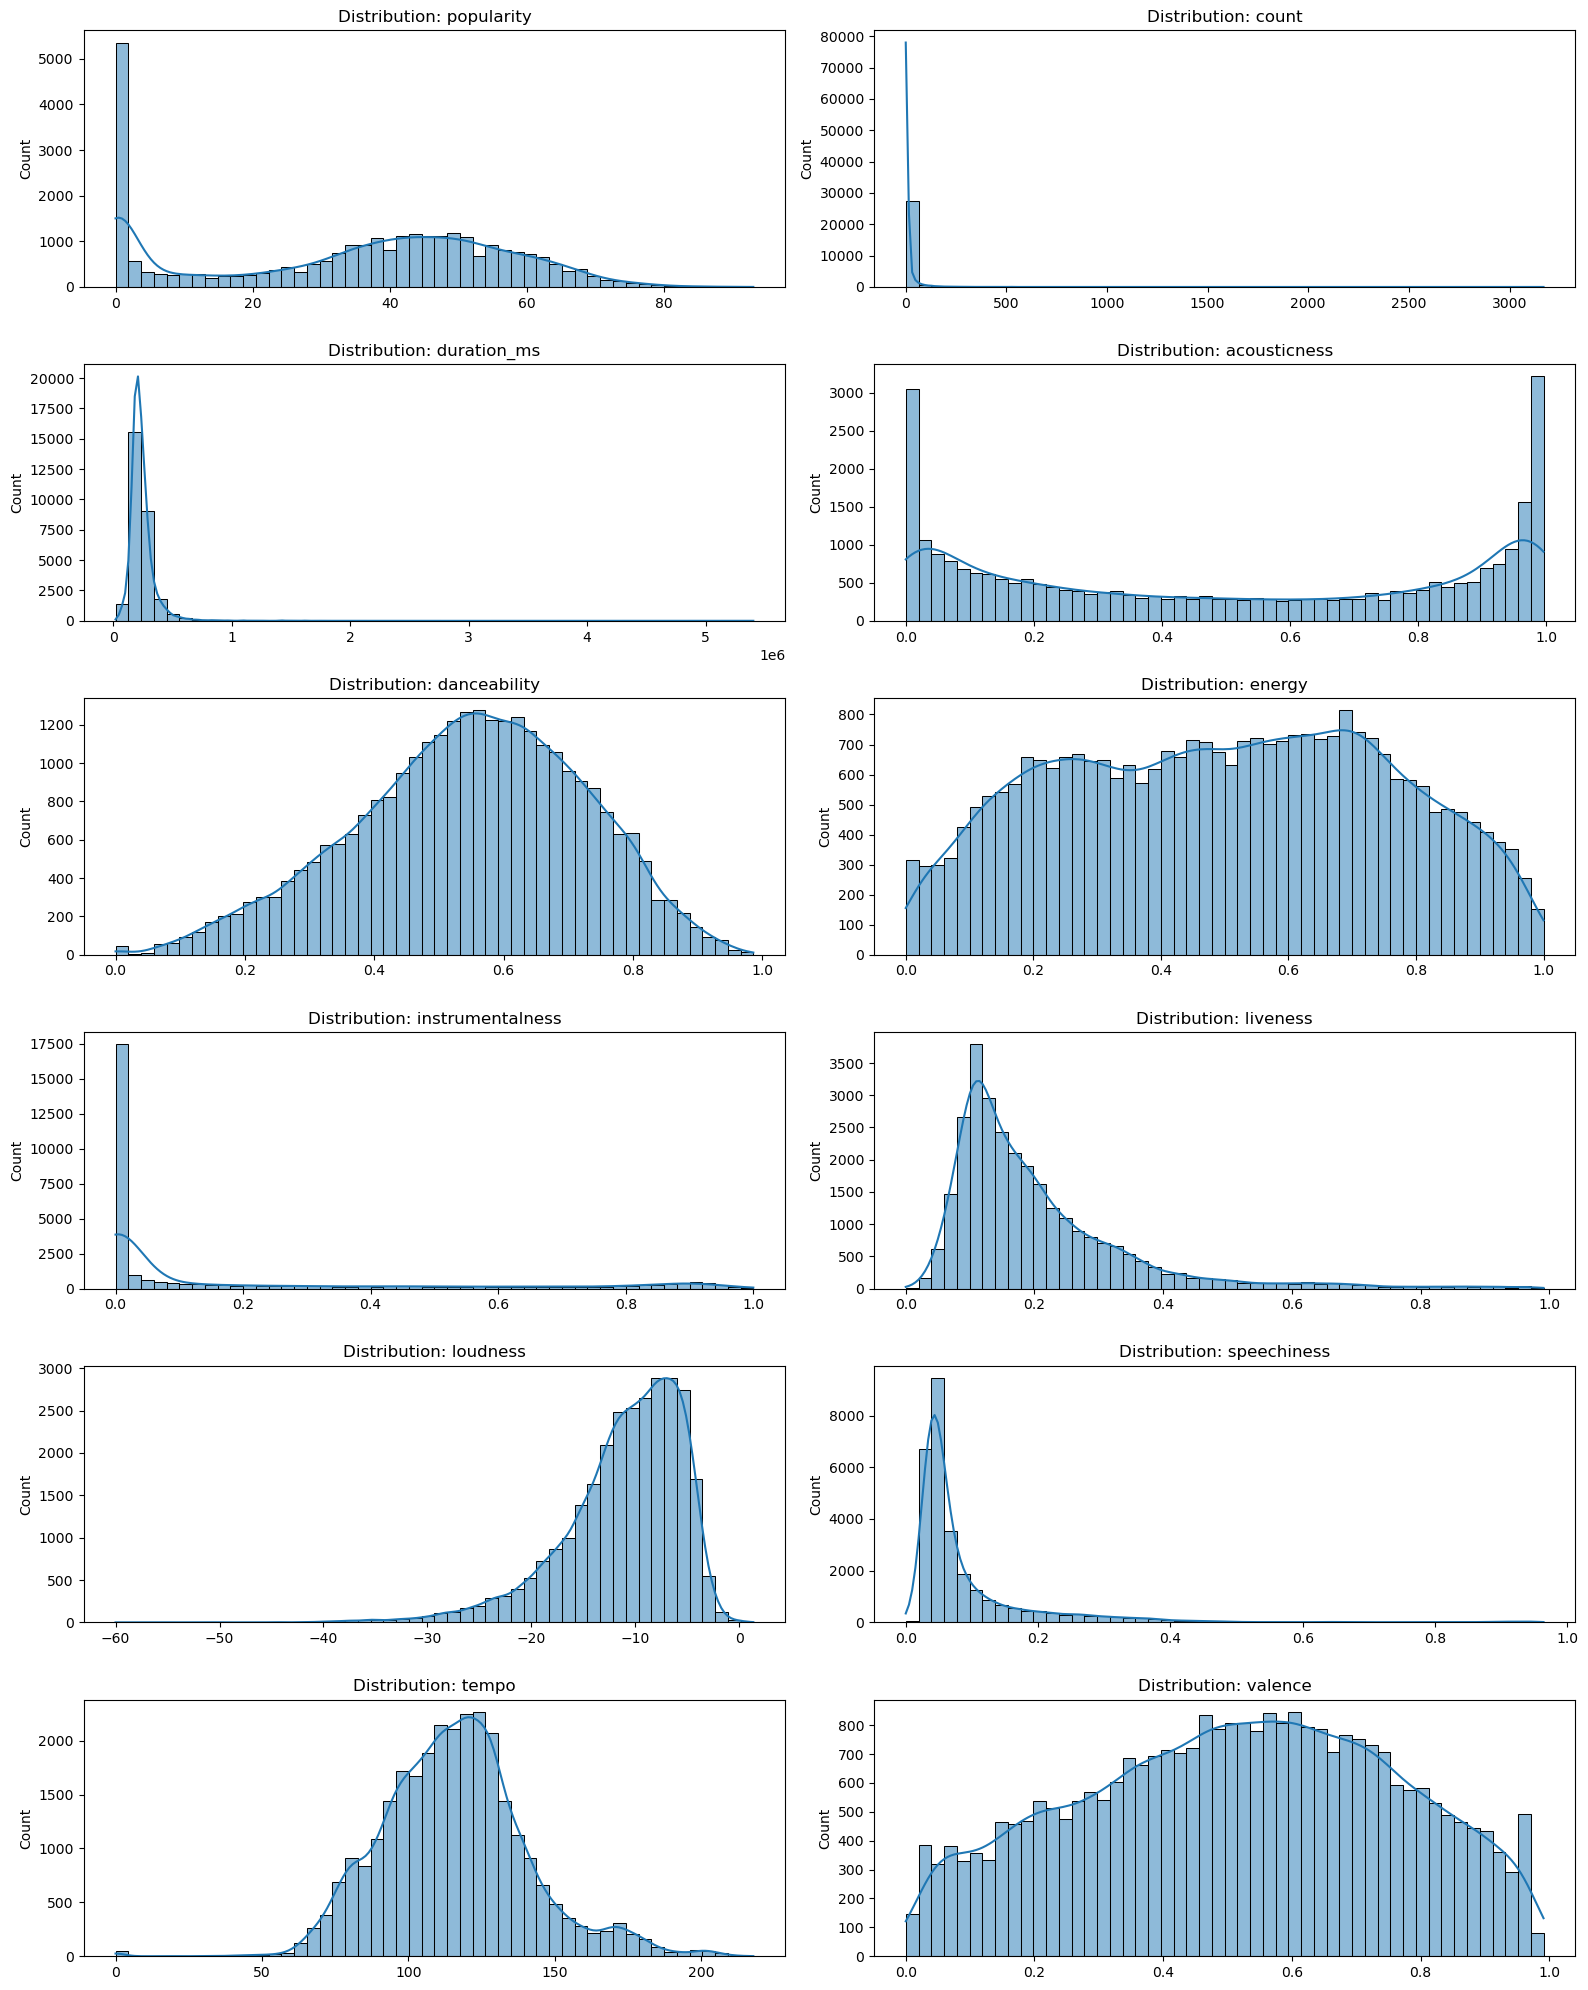

In [13]:
plot_distr(artist_df, numeric_features)

In [14]:
artist_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mode,28680.0,0.759170,0.427595,0.0,1.000000,1.000000,1.000000,1.000
count,28680.0,13.847211,53.372544,1.0,2.000000,3.000000,8.000000,3169.000
acousticness,28680.0,0.498373,0.370614,0.0,0.122296,0.478458,0.896000,0.996
danceability,28680.0,0.546490,0.176474,0.0,0.431000,0.557000,0.675000,0.986
duration_ms,28680.0,238877.995213,121131.840422,18795.5,182330.406250,218640.000000,268467.000000,5403500.000
energy,28680.0,0.497488,0.254885,0.0,0.283568,0.504000,0.702783,1.000
instrumentalness,28680.0,0.174756,0.298406,0.0,0.000004,0.001880,0.215291,1.000
liveness,28680.0,0.202441,0.140884,0.0,0.110362,0.161000,0.247000,0.991
loudness,28680.0,-11.140498,5.771749,-60.0,-13.972292,-10.088938,-6.889000,1.342
speechiness,28680.0,0.094014,0.111986,0.0,0.039200,0.052200,0.095300,0.964


Гистограммы показывают следующие интересные моменты:
 - popularity: большинство артистов имеют низкую среднюю популярность, но есть небольшой хвост с высокой популярностью.
 - count: у большинства артистов 1–10 треков в датасете, но есть и гиганты с сотнями.
 - duration_ms: средняя продолжительность треков в районе 2.5–4 минут.
 - acousticness и instrumentalness: многие артисты тяготеют к крайним значениям (либо очень акустические/инструментальные, либо нет).
 - danceability, energy, valence и tempo: распределения достаточно равномерны, но есть пики (например, много треков с темпом около 120 bpm).

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> Корреляционная матрица (по исполнителям)</h4>
</div>

In [15]:
ar_df = artist_df.select_dtypes(include=['float64', 'int64']).drop(columns=['key', 'mode'])
correlation_matrix = ar_df.corr()

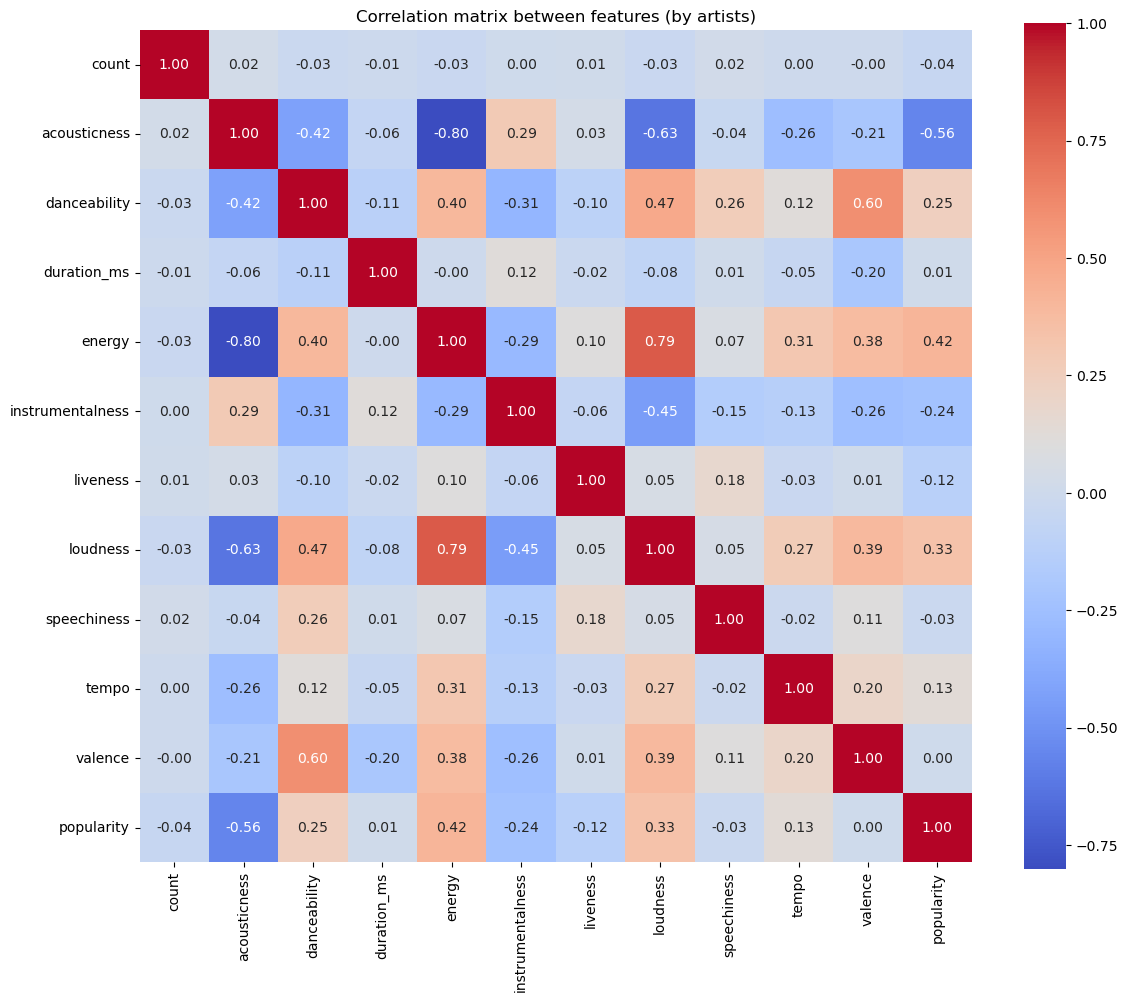

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation matrix between features (by artists)')
plt.tight_layout()
plt.show()

Сильные положительные корреляции:
 - energy и loudness: чем энергичнее треки, тем они громче.
 - acousticness и instrumentalness: акустическая музыка чаще инструментальная.
 - valence и danceability: чем веселее музыка, тем легче она для танцев.

Сильные отрицательные корреляции:
 - acousticness и energy: акустические треки обычно менее энергичные.
 - instrumentalness и speechiness: чем больше инструмента, тем меньше речи.
 - loudness и acousticness: громкие треки - не акустика.

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> data_by_genres.csv</h4>
</div>

Рассмотрим подробнее файл, содержащий агрегированные характеристики по музыкальным жанрам.

In [17]:
genres_df = pd.read_csv(dir_path + genres_path)

In [18]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [19]:
len(genres_df[genres_df.duplicated()])

0

In [20]:
len(genres_df.genres.unique())

2973

In [21]:
genres_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mode,2973.0,0.833165,0.372891,0.000000,1.000000,1.000000,1.000000,1.000000e+00
acousticness,2973.0,0.401241,0.319760,0.000003,0.119050,0.321745,0.673991,9.960000e-01
danceability,2973.0,0.537187,0.150668,0.056900,0.441202,0.546496,0.647500,9.290000e-01
duration_ms,2973.0,251720.854598,94656.856066,30946.000000,206378.846154,237545.336064,277272.000000,2.382587e+06
energy,2973.0,0.561143,0.234486,0.001002,0.395058,0.601195,0.730127,9.946667e-01
instrumentalness,2973.0,0.211366,0.267329,0.000000,0.004835,0.080700,0.343333,9.920000e-01
liveness,2973.0,0.192800,0.092356,0.022200,0.137687,0.178764,0.220856,9.600000e-01
loudness,2973.0,-10.509848,5.369202,-41.825000,-12.427656,-9.221817,-6.920125,6.000000e-02
speechiness,2973.0,0.083588,0.080483,0.023800,0.044900,0.059457,0.091000,9.462187e-01
tempo,2973.0,119.018723,17.469188,47.135722,109.198143,119.194167,127.508750,2.042120e+02


У нас 2973 уникальных жанров. В файле содержатся следующие данные:
 - genres: название жанра
 - mode: мажор (1) или минор (0)
 - acousticness: акустичность (0–1)
 - danceability: танцевальность (0–1)
 - duration_ms: средняя длительность трека в миллисекундах
 - energy: энергичность (0–1)
 - instrumentalness: инструментальность (0–1)
 - liveness: живость (0–1)
 - loudness: средняя громкость (в dB)
 - speechiness: наличие речи (0–1)
 - tempo: темп в BPM
 - valence: эмоциональная окраска (0 – грусть, 1 – радость)
 - popularity: средняя популярность
 - key: тональность (скорее всего 0 = C, 1 = C#, …, 11 = B)

In [22]:
genres_df.head().T

,0,1,2,3,4
mode,1,1,1,1,1
genres,21st century classical,432hz,8-bit,[],a cappella
acousticness,0.979333,0.49478,0.762,0.651417,0.676557
danceability,0.162883,0.299333,0.712,0.529093,0.538961
duration_ms,160297.666667,1048887.333333,115177.0,232880.89025,190628.540887
energy,0.071317,0.450678,0.818,0.419146,0.316434
instrumentalness,0.606834,0.477762,0.876,0.205309,0.003003
liveness,0.3616,0.131,0.126,0.218696,0.172254
loudness,-31.514333,-16.854,-9.18,-12.288965,-12.479387
speechiness,0.040567,0.076817,0.047,0.107872,0.082851


Посмотрим на топ-10 популярных жанров. 

In [23]:
genres_df[['genres', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

,genres,popularity
237,basshall,80.666667
2778,turkish edm,80.000000
2533,south african house,80.000000
2755,trap venezolano,80.000000
46,alberta hip hop,78.500000
536,chinese electropop,78.500000
37,afroswing,77.312500
31,afro soul,77.000000
2383,russian dance,77.000000
1239,guaracha,77.000000


<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> data_by_genres.csv. Distributions.</h4>
</div>

In [24]:
numeric_features_genres = [
    'popularity', 'duration_ms', 'acousticness', 'danceability',
    'energy', 'instrumentalness', 'liveness', 'loudness',
    'speechiness', 'tempo', 'valence', 'key'
]

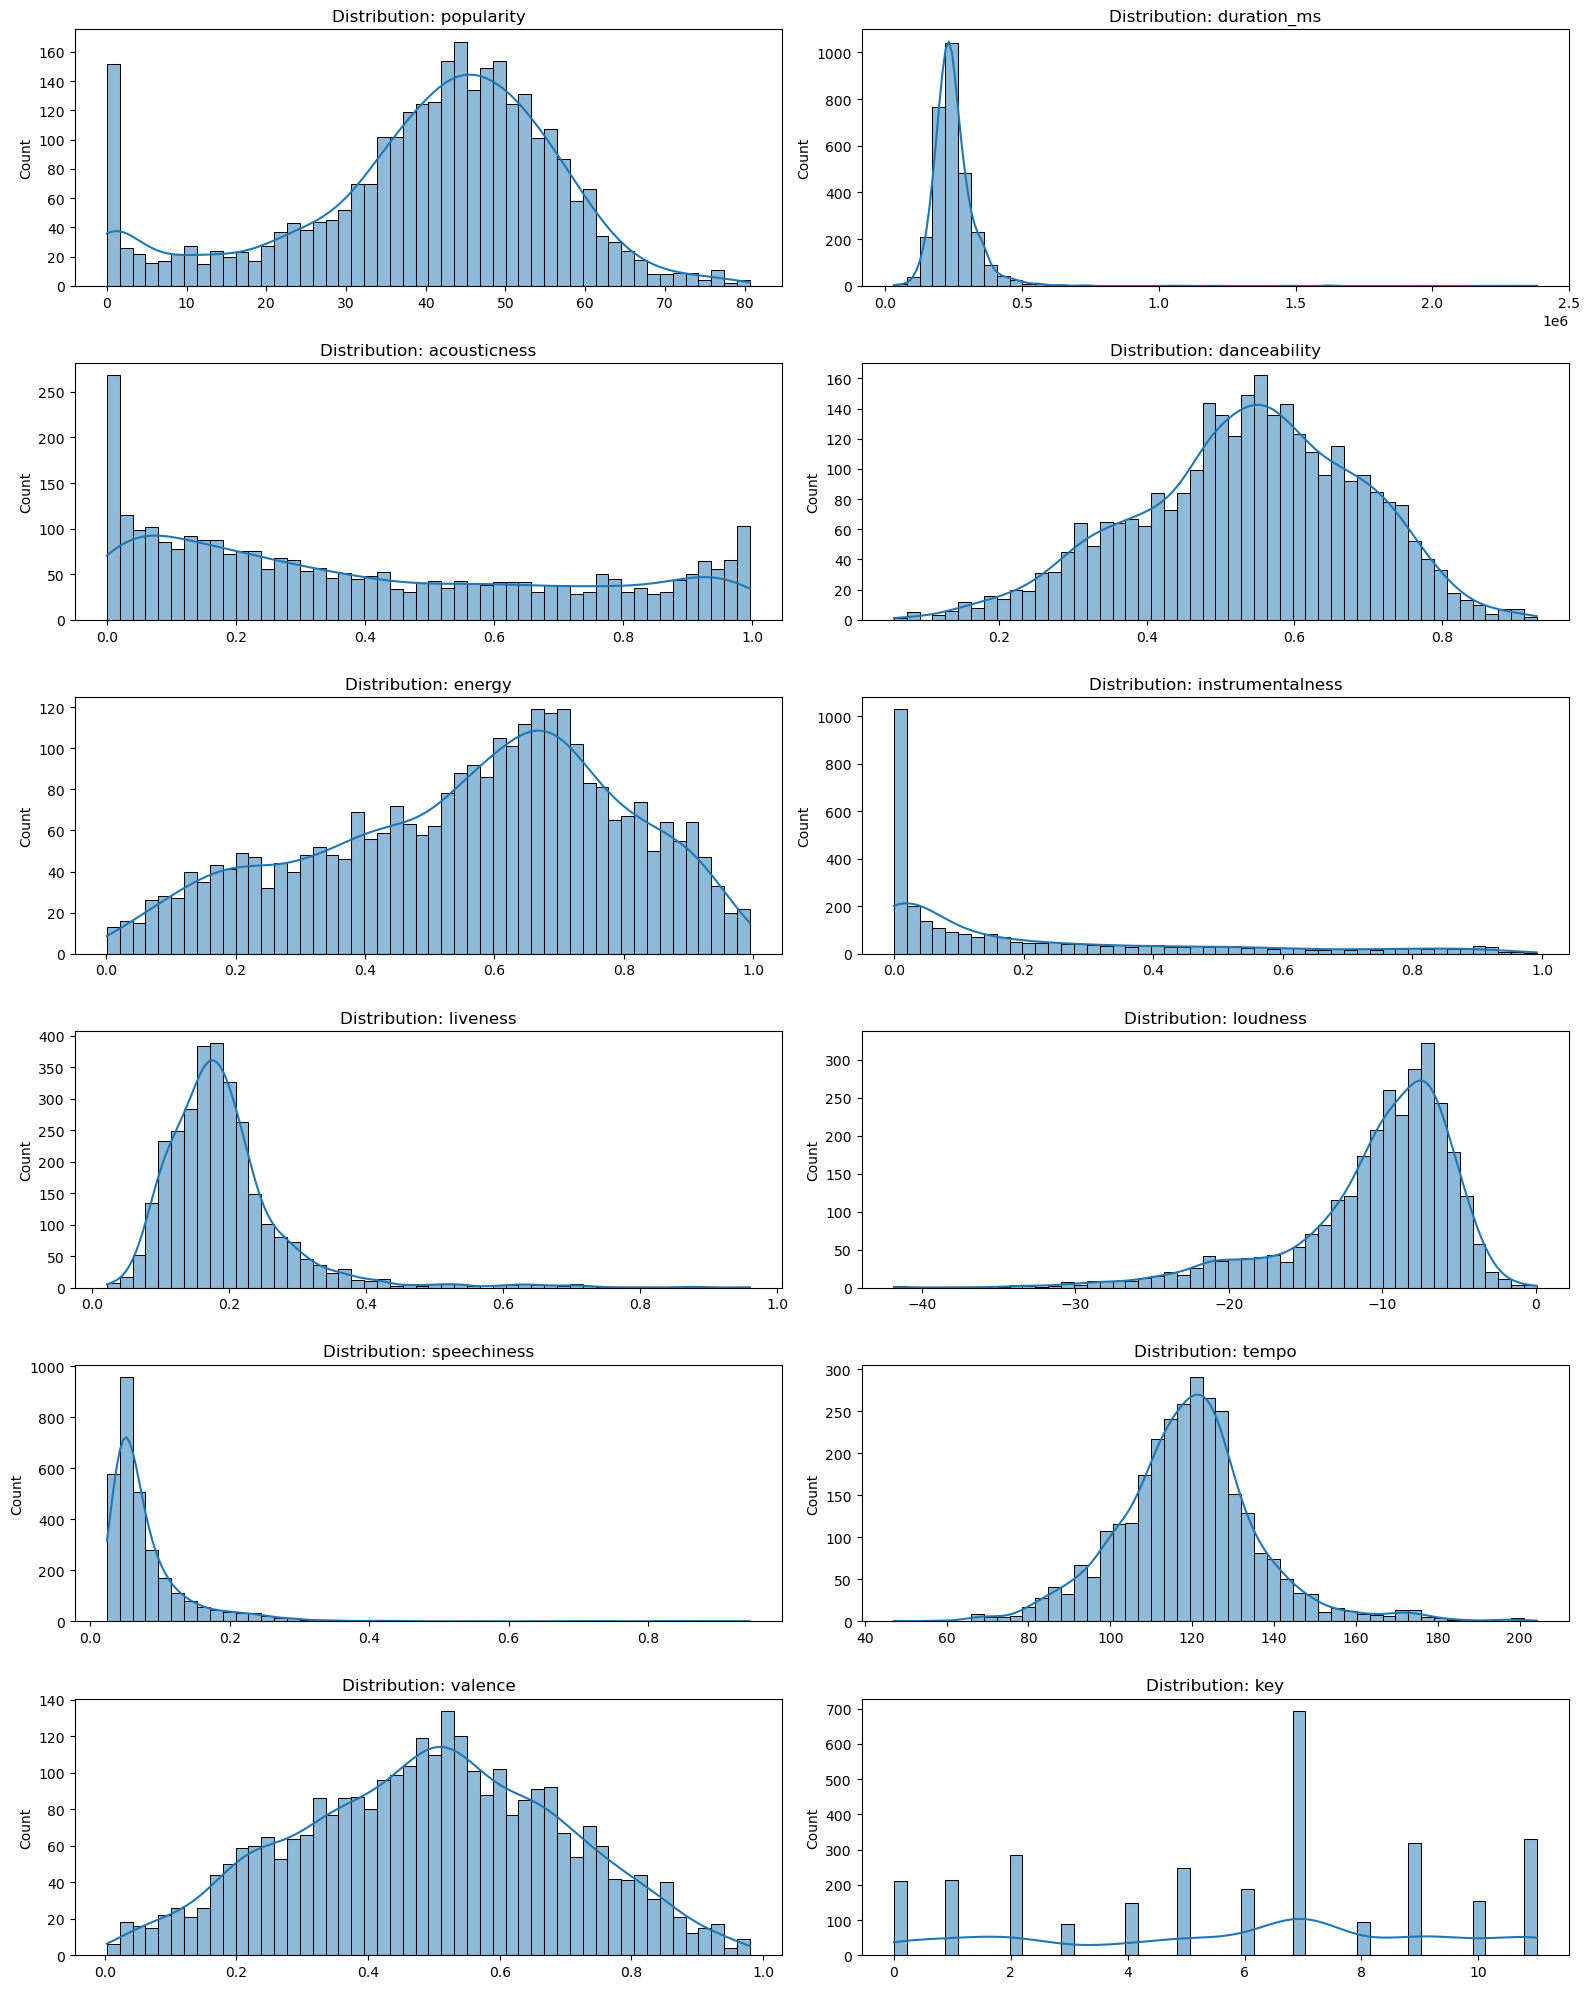

In [25]:
plot_distr(genres_df, numeric_features_genres)

 - popularity: большинство жанров имеют среднюю популярность в диапазоне 30–60.
 - duration_ms: большинство треков укладываются в 2.5–4 минуты, как и ожидалось.
 - acousticness и instrumentalness: большинство жанров сильно сконцентрированы около 0 (немного акустики и инструментов).
 - energy и danceability: распределены ближе к нормальному, но energy чуть смещён вправо — у многих жанров высокая энергия.
 - valence: настроение музыки варьируется сильно — от меланхоличной до весёлой.
 - speechiness: у большинства жанров этот показатель низкий, что ожидаемо.
 - tempo: основной пик — около 120 BPM, классический темп танцевальной музыки.
 - loudness: большинство жанров звучат на уровне -10 dB и громче.
 - liveness: большинство жанров слабо живые?, то есть и записаны вживую?.

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> data_by_genres.csv. Корреляционная матрица (по жанрам)</h4>
</div>

In [26]:
numeric_df_genres = genres_df.select_dtypes(include=['float64', 'int64']).drop(columns=['key', 'mode'])
correlation_matrix_genres = numeric_df_genres.corr()

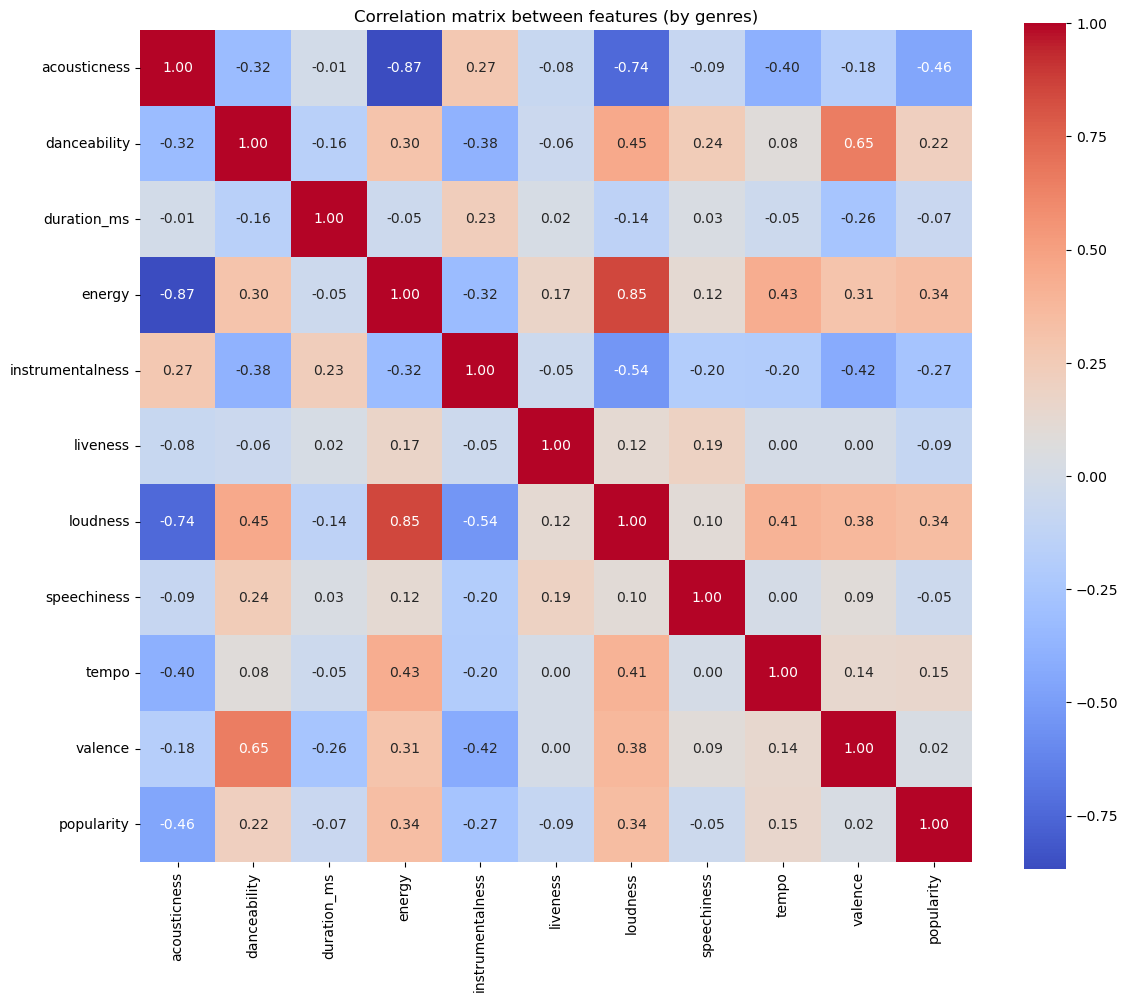

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_genres, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation matrix between features (by genres)')
plt.tight_layout()
plt.show()

Сильные положительные связи:
 - energy,  loudness: как и ожидалось, энергичная музыка звучит громче.
 - acousticness, instrumentalness: акустические жанры часто инструментальные.
 - valence , danceability: весёлые жанры чаще танцевальные.
 - duration_ms, instrumentalness: инструментальная музыка чаще длится дольше.

Сильные отрицательные связи:
 - acousticness, energy: акустика не энергична.
 - instrumentalness, speechiness: в инструментальной музыке меньше речи.
 - loudness, acousticness: акустическая музыка тише.

Популярность почти не коррелирует с другими фичами (все корреляции < 0.2), что говорит о её многозначности и возможной зависимости от внешних факторов (тренды, маркетинг, культура и т.д.).

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> data_by_year.csv</h4>
</div>

Рассмотрим подробнее файл, содержащий динамику звучания треков по годам.

In [28]:
df_by_year = pd.read_csv(dir_path+year_path)

In [29]:
df_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [30]:
len(df_by_year[df_by_year.duplicated()])

0

In [31]:
len(df_by_year.year.unique())

100

In [32]:
df_by_year.describe().T

,count,mean,std,min,25%,50%,75%,max
mode,100.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
year,100.0,1970.500000,29.011492,1921.000000,1945.750000,1970.500000,1995.250000,2020.000000
acousticness,100.0,0.556317,0.275358,0.219931,0.289516,0.459190,0.856711,0.962607
danceability,100.0,0.536783,0.052356,0.414445,0.500800,0.540976,0.570948,0.692904
duration_ms,100.0,227296.752234,25630.048065,156881.657475,210889.193536,235520.850833,247702.738058,267677.823086
energy,100.0,0.452705,0.161738,0.207948,0.280733,0.495997,0.598008,0.681778
instrumentalness,100.0,0.193582,0.122488,0.016376,0.103323,0.127644,0.276707,0.581701
liveness,100.0,0.208224,0.017903,0.168450,0.197509,0.206074,0.218493,0.264335
loudness,100.0,-11.969054,3.105610,-19.275282,-14.189232,-11.773061,-9.950542,-6.595067
speechiness,100.0,0.105861,0.082128,0.049098,0.064244,0.085763,0.104438,0.490001


В этом файле 100 уникалиных ненулевых записей, c 1921 по 2020 год. Данные содержат аналогичные предыдущим файлам столбцы:
 - year: год выпуска
 - mode: мажор (1) или минор (0)
 - acousticness: акустичность (0–1)
 - danceability: танцевальность (0–1)
 - duration_ms: средняя длительность трека в миллисекундах
 - energy: энергичность (0–1)
 - instrumentalness: инструментальность (0–1)
 - liveness: живость (0–1)
 - loudness: средняя громкость (в dB)
 - speechiness: наличие речи (0–1)
 - tempo: темп в BPM
 - valence: эмоциональная окраска (0 – грусть, 1 – радость)
 - popularity: средняя популярность
 - key: тональность (скорее всего 0 = C, 1 = C#, …, 11 = B)

In [33]:
df_by_year.head().T

,0,1,2,3,4
mode,1.000000,1.000000,1.000000,1.000000,1.000000
year,1921.000000,1922.000000,1923.000000,1924.000000,1925.000000
acousticness,0.886896,0.938592,0.957247,0.940200,0.962607
danceability,0.418597,0.482042,0.577341,0.549894,0.573863
duration_ms,260537.166667,165469.746479,177942.362162,191046.707627,184986.924460
energy,0.231815,0.237815,0.262406,0.344347,0.278594
instrumentalness,0.344878,0.434195,0.371733,0.581701,0.418297
liveness,0.205710,0.240720,0.227462,0.235219,0.237668
loudness,-17.048667,-19.275282,-14.129211,-14.231343,-14.146414
speechiness,0.073662,0.116655,0.093949,0.092089,0.111918


Посмотрим песни каких сейчас более популярны:

In [34]:
df_by_year[['year', 'popularity']].sort_values(by='popularity', ascending=False).head(10)

,year,popularity
98,2019,65.256542
99,2020,64.301970
97,2018,63.296243
96,2017,63.263554
95,2016,59.647190
94,2015,56.700608
93,2014,55.543142
92,2013,54.047065
90,2011,53.307387
89,2010,52.730159


Ожидаемо популярнее новые треки.

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> data_by_year.csv. Визуализации</h4>
</div>

In [35]:
features_by_year = [
    'popularity', 'duration_ms', 'acousticness', 'danceability',
    'energy', 'instrumentalness', 'liveness', 'loudness',
    'speechiness', 'tempo', 'valence', 'key'
]

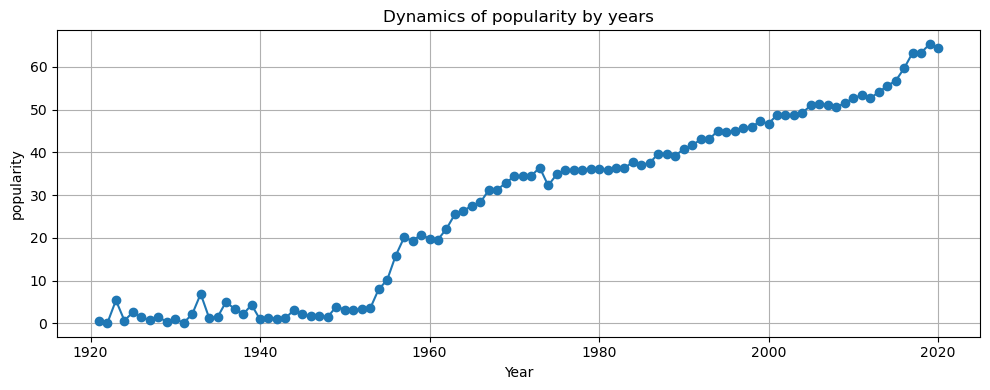

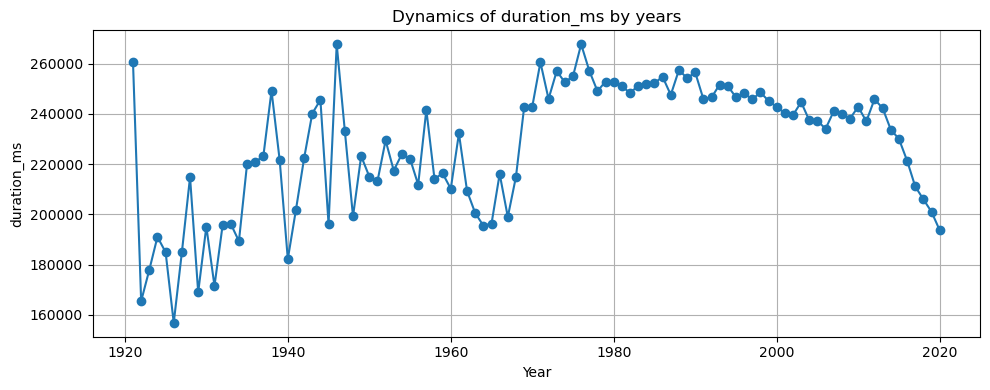

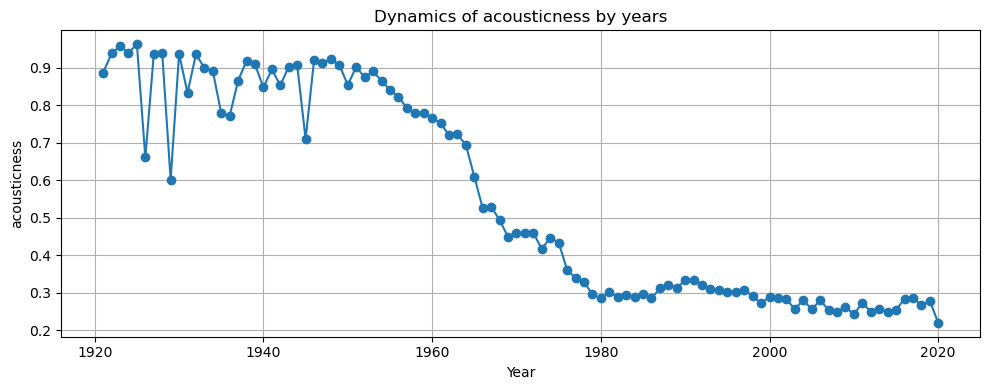

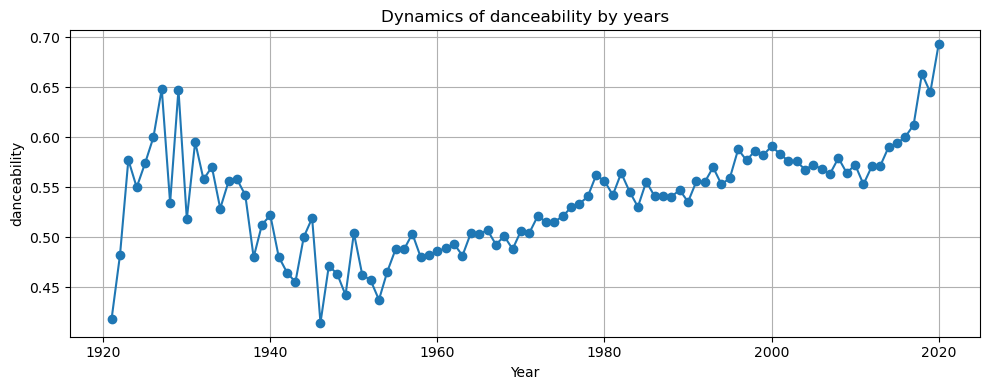

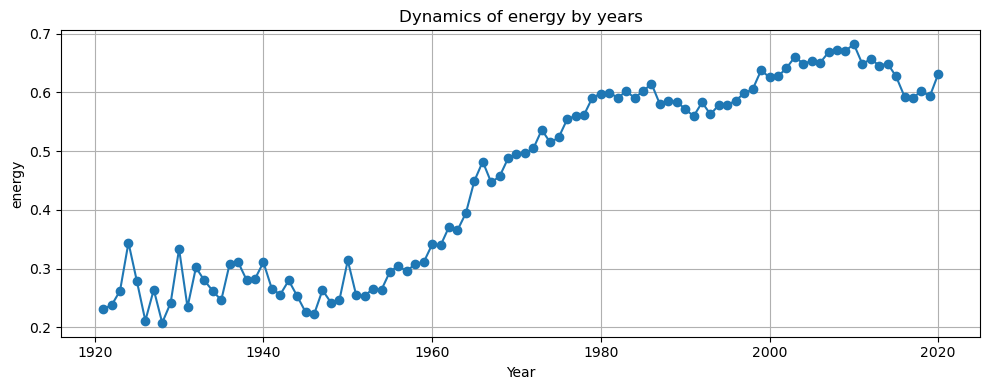

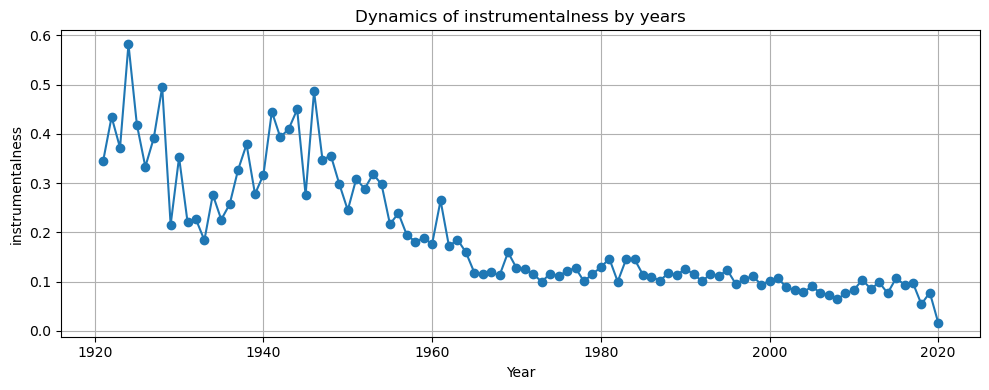

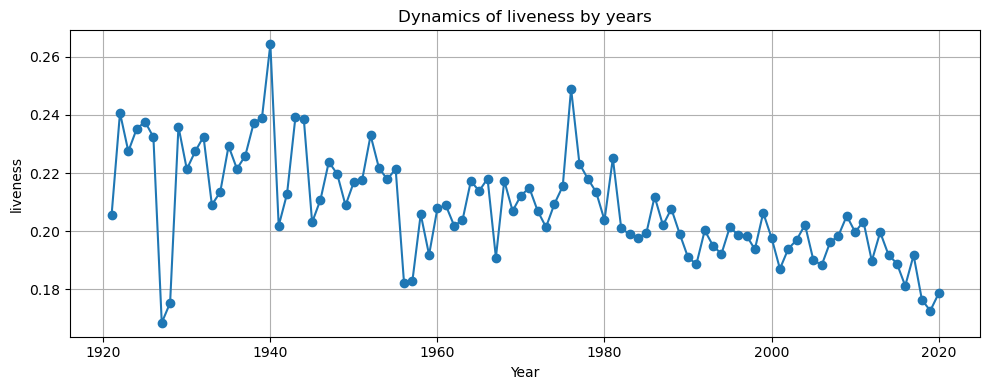

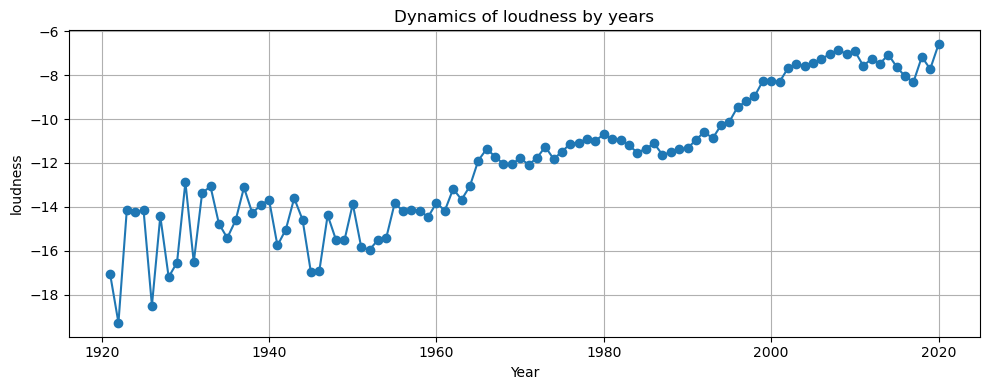

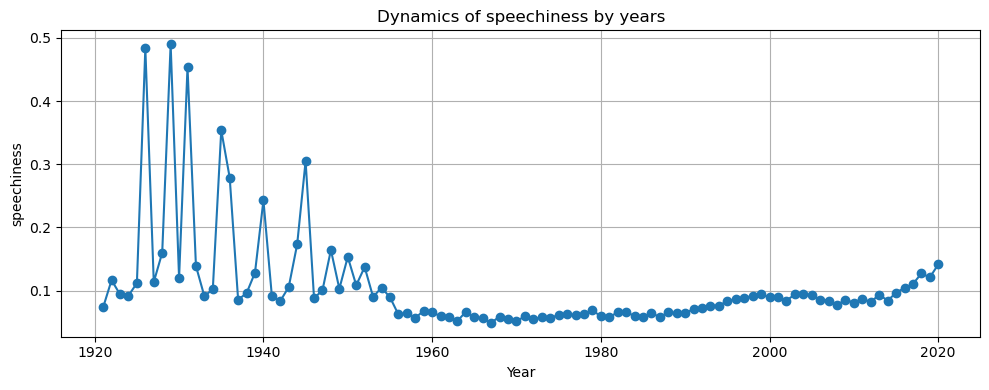

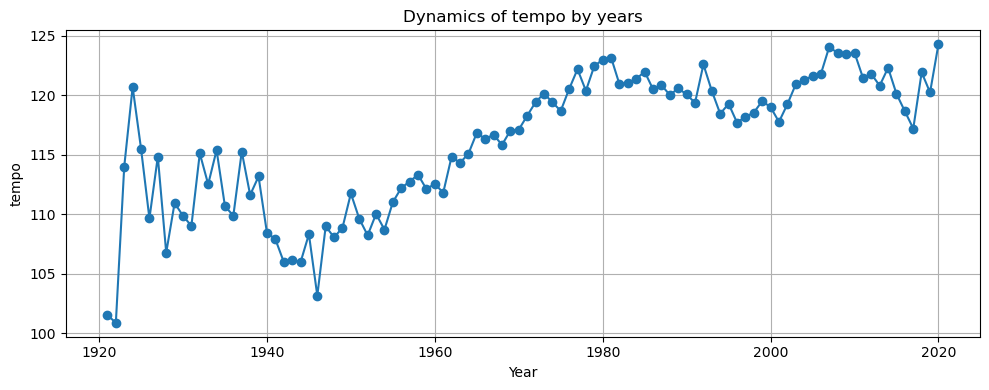

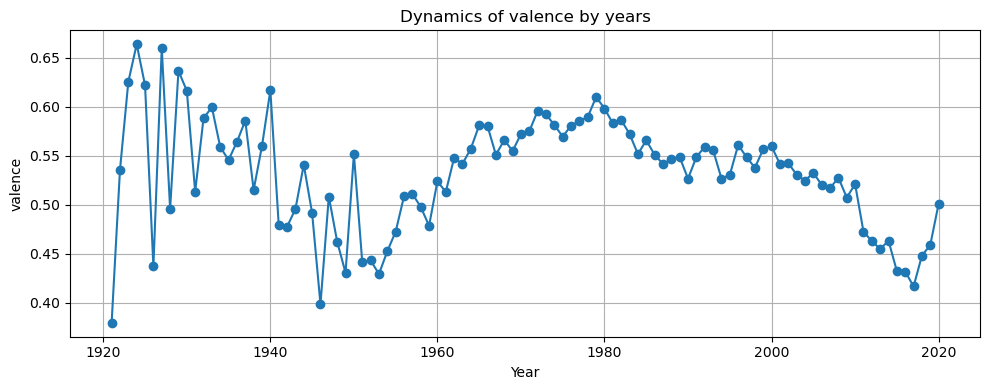

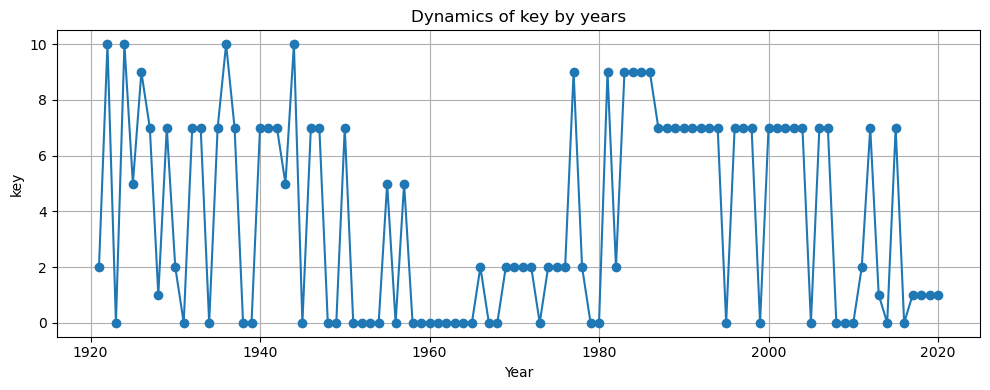

In [36]:
for feature in features_by_year:
    plt.figure(figsize=(10, 4))
    plt.plot(df_by_year['year'], df_by_year[feature], marker='o')
    plt.title(f'Dynamics of {feature} by years')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

 - Danceability и Energy заметно возросли с 1950–60-х — музыка стала более ритмичной и энергичной.
 - Acousticness сильно снизилась — акцент сместился от акустических инструментов к электронной обработке.
 - Instrumentalness уверенно снижается с 50-х.
 - Speechiness начала расти с 90-х, возможно из-за популяризации рэпа.
 - Valence имеет волнообразный тренд — начиная с высоких значений в 60-х, постепенно снижается.
 - Loudness устойчиво росла до 2010-х, затем немного снизилась.

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> data_w_genres.csv</h4>
</div>

In [37]:
df_w_genres = pd.read_csv(dir_path+wgenres_path, converters={'genres': ast.literal_eval})

In [38]:
df_w_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [39]:
df_w_genres.head().T

,0,1,2,3,4
genres,[show tunes],[],[],[],[]
artists,"""Cats"" 1981 Original London Cast","""Cats"" 1983 Broadway Cast","""Fiddler On The Roof” Motion Picture Chorus","""Fiddler On The Roof” Motion Picture Orchestra","""Joseph And The Amazing Technicolor Dreamcoat""..."
acousticness,0.590111,0.862538,0.856571,0.884926,0.510714
danceability,0.467222,0.441731,0.348286,0.425074,0.467143
duration_ms,250318.555556,287280.0,328920.0,262890.962963,270436.142857
energy,0.394003,0.406808,0.286571,0.24577,0.488286
instrumentalness,0.0114,0.081158,0.024593,0.073587,0.0094
liveness,0.290833,0.315215,0.325786,0.275481,0.195
loudness,-14.448,-10.69,-15.230714,-15.63937,-10.236714
speechiness,0.210389,0.176212,0.118514,0.1232,0.098543


Это расширение data_by_artist.csv, где теперь к каждому артисту добавлен жанровый контекст.
 - genres: жанры (возможно, множественные, как строки с перечислением)
 - artists: имя исполнителя
 - count: количество треков у артиста
 - acousticness … valence: аудиохарактеристики
 - popularity: средняя популярность
 - key, mode: музыкальная тональность и лад

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> data_w_genres.csv. Distributions.</h4>
</div>

In [40]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

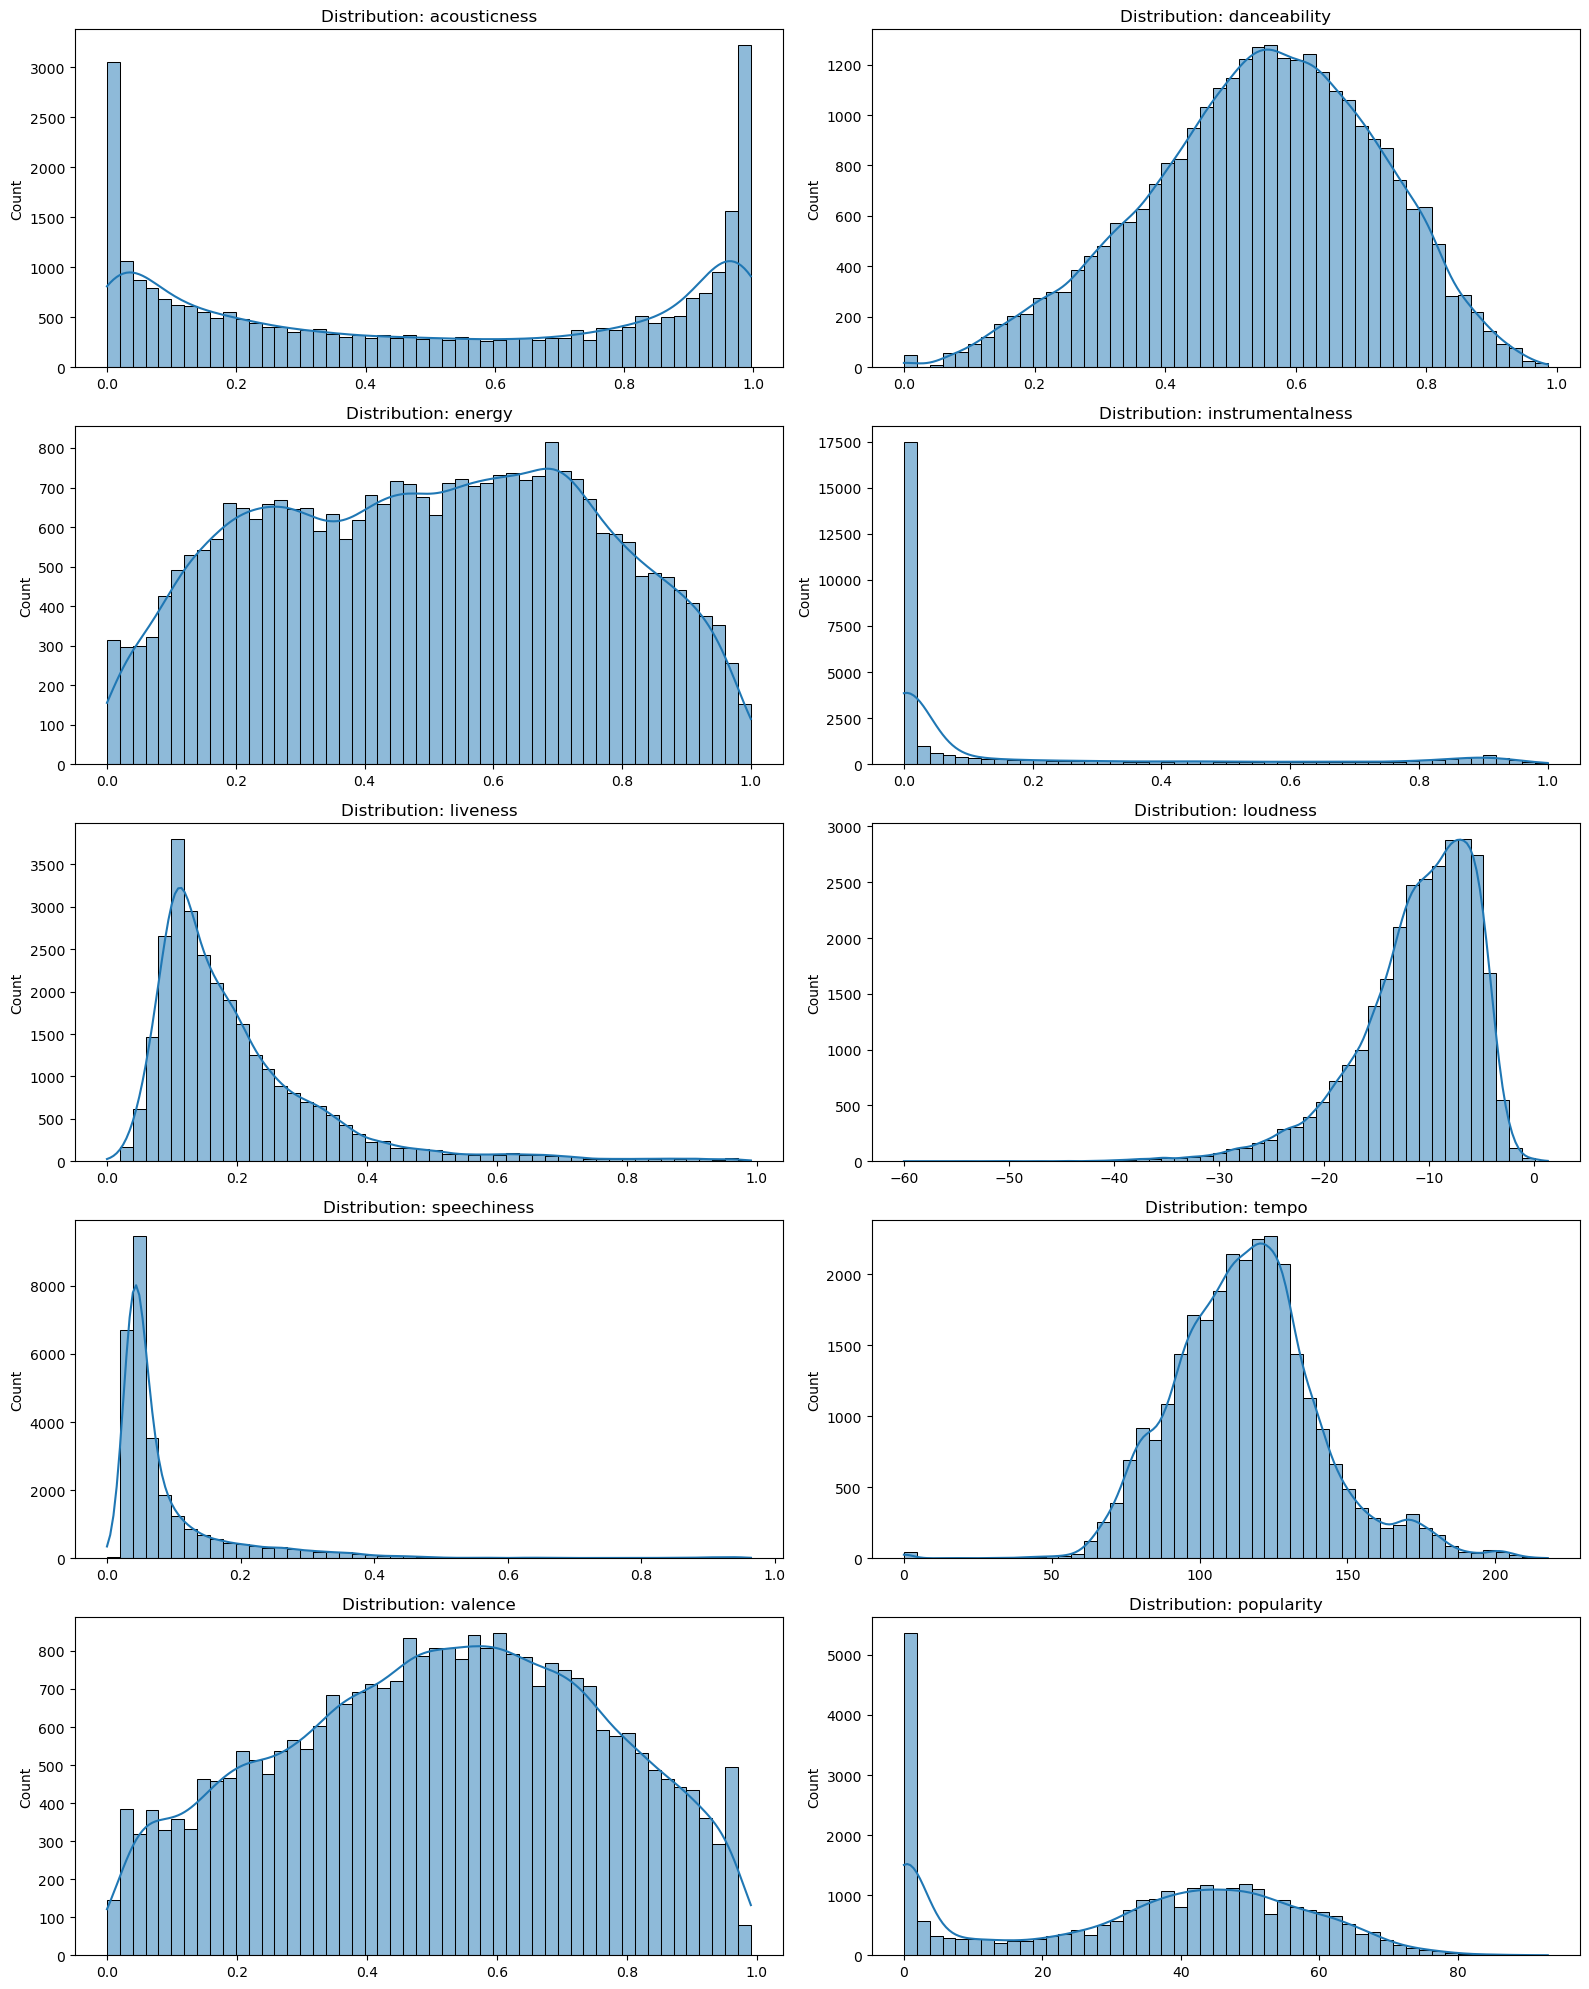

In [41]:
plot_distr(df_w_genres, features)

 - danceability, energy, valence, tempo имеют примерно нормальное или равномерное распределение, valence (настроение) слегка скошен вправо, т.е. больше позитивных треков.
 - popularity сильно смещено влево, большинство треков малопопулярны.
 - acousticness, instrumentalness - на платформе доминирует современное цифровое звучание, мало чисто акустических или инструментальных треков.
 - liveness - скошено влево, концертные записи встречаются, но редко.
 - speechiness - большинство треков - стандартное вокальное исполнение
 - duration_ms - структура длительности соответствует типичной музыке, но есть некоторые отклонения, возможно подкасты или концертные записи.

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> data.csv</h4>
</div>

In [42]:
df_tracks = pd.read_csv(dir_path + data_path, converters={'artists': ast.literal_eval})

In [43]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [44]:
df_tracks.describe().T

,count,mean,std,min,25%,50%,75%,max
valence,170653.0,0.528587,0.263171,0.0,0.3170,0.540000,0.7470,1.000
year,170653.0,1976.787241,25.917853,1921.0,1956.0000,1977.000000,1999.0000,2020.000
acousticness,170653.0,0.502115,0.376032,0.0,0.1020,0.516000,0.8930,0.996
danceability,170653.0,0.537396,0.176138,0.0,0.4150,0.548000,0.6680,0.988
duration_ms,170653.0,230948.310666,126118.414668,5108.0,169827.0000,207467.000000,262400.0000,5403500.000
energy,170653.0,0.482389,0.267646,0.0,0.2550,0.471000,0.7030,1.000
explicit,170653.0,0.084575,0.278249,0.0,0.0000,0.000000,0.0000,1.000
instrumentalness,170653.0,0.167010,0.313475,0.0,0.0000,0.000216,0.1020,1.000
key,170653.0,5.199844,3.515094,0.0,2.0000,5.000000,8.0000,11.000
liveness,170653.0,0.205839,0.174805,0.0,0.0988,0.136000,0.2610,1.000


data.csv — основная таблица с метаданными треков: название, исполнитель(и), популярность, аудио признаки (танцевальность, акустичность, и т.д.).
Имеем 170653 уникальных ненулевых записи. Файл содержит столбцы с следующими данными:
 - name — название трека
 - artists - исполнитель
 - id - ID в Spotify
 - release_date — дата релиза
 - year - год релиза
 - explicit - 1, если трек содержит ненормативную лексику
 - popularity — популярность
 - acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, duration_ms, mode, key - аудиохарактеристики

In [45]:
df_tracks.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"[Sergei Rachmaninoff, James Levine, Berliner P...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,[Dennis Day],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,[Frank Parker],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,[Phil Regan],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;">  Dataset Preparation. </h4>
</div>

Дополним df_tracks колонкой с жанрами, которые у нас есть в df_w_genres.

In [46]:
# Создадим словарь соответствия артистов и жанров
artist_to_genres = df_w_genres.set_index('artists')['genres'].to_dict()

In [47]:
def get_genres_for_track(track_artists):
    """
    Return the genres for a track based on its list of artists.
    Parameters
        track_artists : list of str
            A list of artist names (as strings) associated with the track.
    Returns
        list of str or None
            A list of genres corresponding to the first matched artist,
            or None if none of the artists are found in the mapping.
    """
    for artist in track_artists:
        if artist in artist_to_genres:
            return artist_to_genres[artist]
    return None

In [48]:
df_tracks['genres'] = df_tracks['artists'].apply(get_genres_for_track)

In [49]:
df_tracks.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,genres
0,0.0594,1921,0.982,"[Sergei Rachmaninoff, James Levine, Berliner P...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,"[classical, post-romantic era, russian romanti..."
1,0.9630,1921,0.732,[Dennis Day],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,[]
2,0.0394,1921,0.961,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,[]
3,0.1650,1921,0.967,[Frank Parker],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,[]
4,0.2530,1921,0.957,[Phil Regan],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,[]


Сделаем предположение, что язык исполнения песни играет роль для качетва рекомендаций, попробуем определить основой язык для каждого исполнителя.

In [50]:
from collections import defaultdict

In [51]:
def get_artist_language(artist_list) -> str:
    """
    Determine the language associated with the first artist in the list.
    Parameters
        artist_list : List[str]
            A list of artist names.
    Returns
        str
            The detected language of the first artist in the list, or "unknown" if not found.
    """
    if not isinstance(artist_list, list) or not artist_list:
        return "unknown"
    return artist_to_lang.get(artist_list[0], "unknown")

In [52]:
def join_titles(title_list) -> str:
    """
    Join a list of title fragments into a single string.
    Parameters
        title_list :List[str]
            A list of strings representing parts of a title.
    Returns
        str
            A single string made by joining the list elements with spaces,
            or an empty string if the input is not a list.
    """
    if isinstance(title_list, list):
        return ' '.join(title_list)
    return ''

In [53]:
# Соберём названия песен по каждому артисту
artist_titles = defaultdict(list)

for _, row in df_tracks.iterrows():
    artists = row['artists']
    title = row['name']
    if isinstance(artists, list):
        for artist in artists:
            artist_titles[artist].append(title)

In [54]:
# Посмотрим что получилось
artist_titles['Damia']

['La Rue De La Joie',
 'Le Grand Frisé',
 'Le Portrait',
 'La Chaine',
 'Ne Dis Rien',
 'La Veuve',
 'La Guinguette A Fermé Ses Volets',
 'Berceuse Tendre',
 'La Mauvaise Prière',
 "J'ai Bu",
 'La Suppliante',
 "Tu M'oublieras",
 "La Garde De Nuit À L'yser",
 'Hantise',
 'Les Goélands',
 'Dis Moi Pourquoi',
 "C'est Mon Gigolo"]

In [55]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

In [56]:
def detect_language(text: str) -> str:
    """
    Detect the language of a given text string.
    Parameters
        text : str
            The input text to detect the language for.
    Returns
        str
            The ISO 639-1 language code (e.g., 'en', 'fr', 'de'),
            or "unknown" if detection fails.
    """
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

In [57]:
def detect_language_name_artist(row: pd.Series) -> str:
    """
    Detect the language of a track using its name and the first listed artist.
    Parameters
        row : pd.Series
            A row from a DataFrame that contains at least the 'name' and 'artists' columns.
    Returns
    str
        Detected language code (e.g., 'en', 'es', 'fr'), or "unknown" if detection fails.
    """
    full_text = f"{row['name']} - {row['artists'][0]}"
    return detect_language_safe(full_text)

In [58]:
DetectorFactory.seed = 42

# Создадим DataFrame для языка по артисту
df_artist_lang = pd.DataFrame({'artists': list(artist_titles.keys())})
df_artist_lang['titles'] = df_artist_lang['artists'].map(artist_titles)
df_artist_lang['full_text'] = df_artist_lang['titles'].apply(join_titles)
df_artist_lang['detected_language'] = df_artist_lang['full_text'].apply(detect_language)

In [59]:
df_artist_lang.head()

,artists,titles,full_text,detected_language
0,Sergei Rachmaninoff,"[Piano Concerto No. 3 in D Minor, Op. 30: III....","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",en
1,James Levine,"[Piano Concerto No. 3 in D Minor, Op. 30: III....","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",it
2,Berliner Philharmoniker,"[Piano Concerto No. 3 in D Minor, Op. 30: III....","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",en
3,Dennis Day,"[Clancy Lowered the Boom, Galway Bay, How Can ...",Clancy Lowered the Boom Galway Bay How Can You...,en
4,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,"[Gati Bali, Gati Mardika, Raja Manggala, Gati ...",Gati Bali Gati Mardika Raja Manggala Gati Main...,id


In [60]:
# Преобразуем df_artist_lang в словарь 
artist_to_lang = df_artist_lang.set_index('artists')['detected_language'].to_dict()

In [61]:
def get_artist_language(artist_list) -> str:
    """
    Get the language associated with the first artist in the list.
    Parameters
        artist_list : List[str]
            A list of artist names, or a single string (non-list input will be treated as invalid).
    Returns
    str
        The language code (e.g., 'en', 'fr', 'ru') associated with the first artist,
        or "unknown" if the artist is not found or input is invalid.
    """
    if not isinstance(artist_list, list) or not artist_list:
        return 'unknown'
    return artist_to_lang.get(artist_list[0], 'unknown')

In [62]:
# Добавим колонку с языком артиста в df_tracks
df_tracks['detected_language'] = df_tracks['artists'].apply(get_artist_language)

In [63]:
df_tracks.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,genres,detected_language
0,0.0594,1921,0.982,"[Sergei Rachmaninoff, James Levine, Berliner P...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,"[classical, post-romantic era, russian romanti...",en
1,0.9630,1921,0.732,[Dennis Day],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,[],en
2,0.0394,1921,0.961,[KHP Kridhamardawa Karaton Ngayogyakarta Hadin...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,[],id
3,0.1650,1921,0.967,[Frank Parker],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,[],cy
4,0.2530,1921,0.957,[Phil Regan],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,[],en


<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> data.csv. Distributions</h4>
</div>

In [64]:
numeric_columns = [
    'valence', 'year', 'acousticness', 'danceability', 'duration_ms',
    'energy', 'explicit', 'instrumentalness', 'key', 'liveness',
    'loudness', 'mode', 'popularity', 'speechiness', 'tempo'
]

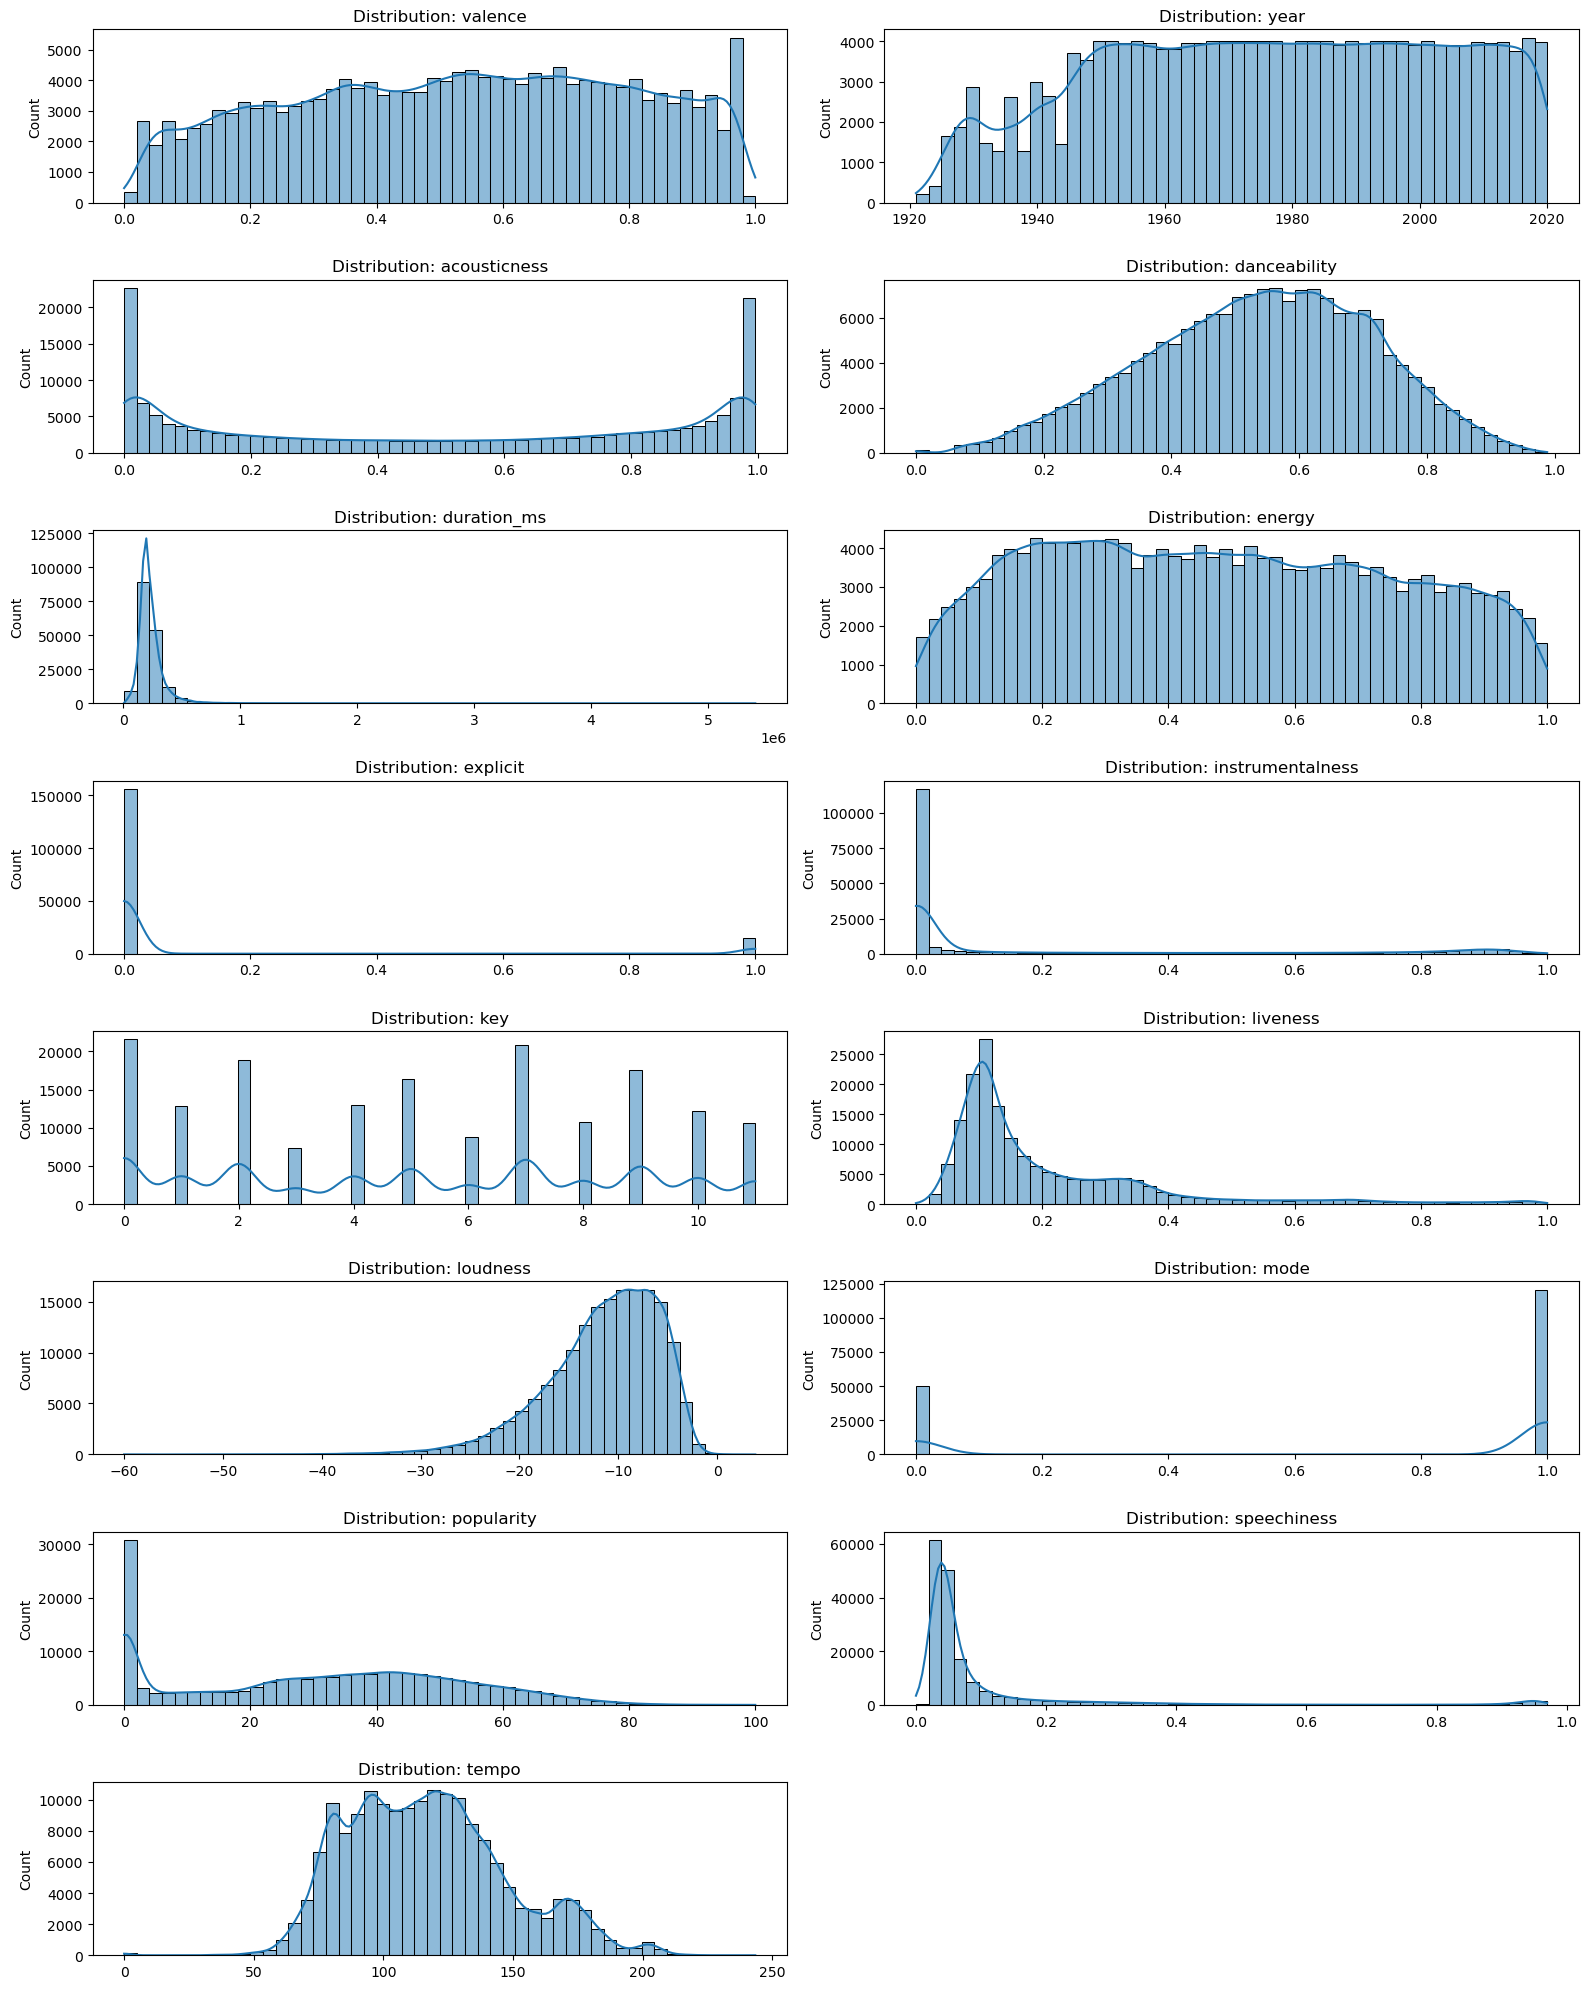

In [65]:
plot_distr(df_tracks, numeric_columns)

 - Acousticness: сильно смещено к 0 — большинство песен не акустические.
 - Danceability и Energy: похожи на нормальное распределение, пик около 0.6–0.7.
 - Instrumentalness: экстремально правостороннее — инструментальных треков крайне мало.
 - Liveness: подавляющее большинство студийных записей, но есть небольшой пик около 0.8–1.
 - Loudness: распределение почти нормальное, максимум в районе −6 dB.
 - Speechiness: большинство песен с низким значением, с небольшим всплеском.
 - Tempo: мультимодальное, с основным пиком около 120 BPM.
 - Valence: равномерное распределение — эмоции в музыке варьируются.
 - Popularity: пик в районе 50–60, с хвостами вниз (непопулярные треки) и вверх (хиты).

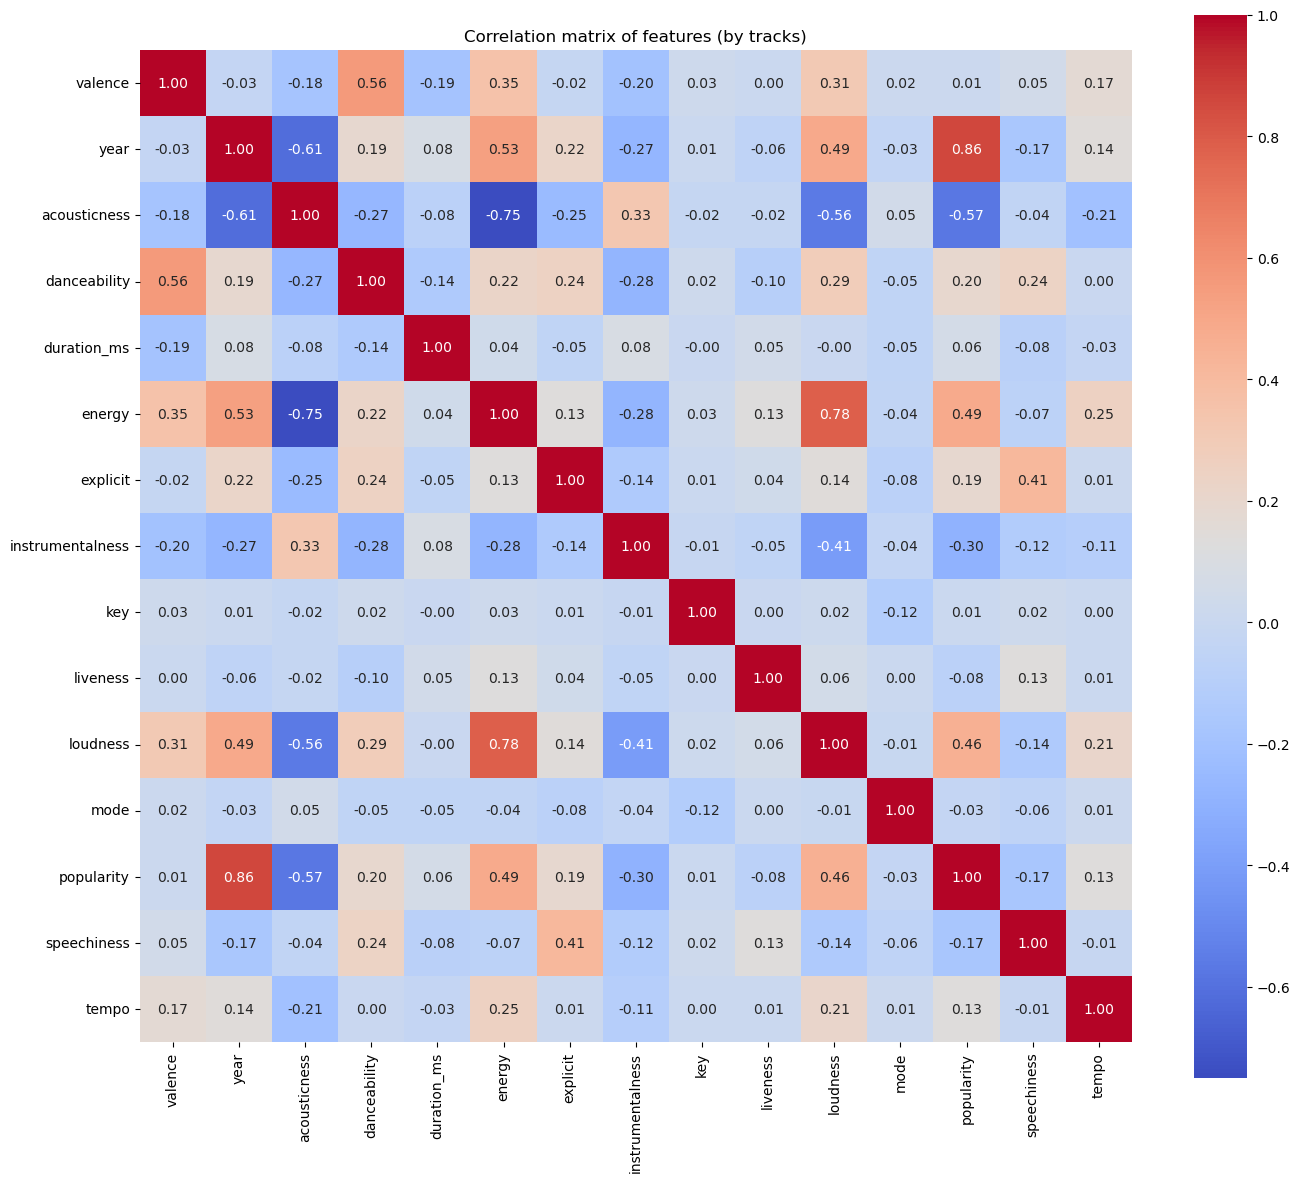

In [66]:
correlation_matrix = df_tracks[numeric_columns].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation matrix of features (by tracks)')
plt.tight_layout()
plt.show()

 - energy, loudness: ожидаемо, энергичные треки звучат громче.
 - valence, danceability: весёлые треки лучше для танцев.
 - acousticness, energy/loudness: акустическая музыка тише и менее энергична.
 - instrumentalness, speechiness: в инструментальных композициях меньше речи.

Popularity не коррелирует ни с чем — популярность не зависит напрямую от аудиохарактеристик.

<div style="background-color: lightblue; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> Сontent-based recomendation</h4>
</div>

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display
import numpy as np

<div style="background-color: lightgray; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> Metrics</h4>
</div>

Определим метрики для оценки качества.

In [68]:
def precision_recall_by_artists(recommended_artists, user_artists, k=10):
    """
    Calculate precision and recall at k based on artist matching.
    Parameters
        recommended_artists : List[str]
            List of recommended artist names.
    
        user_artists : List[str]
            List of user-preferred artist names (ground truth).
    
        k : int, optional
            Number of top recommendations to consider (default is 10).
    Returns
        Tuple[float, float]
            A tuple containing:
            - precision
            - recall
    """
    user_artists_set = set(user_artists)
    recommended_k = recommended_artists[:k]
    true_positives = sum([1 for a in recommended_k if a in user_artists_set])
    precision = true_positives / k
    recall = true_positives / len(user_artists_set) if user_artists_set else 0
    return precision, recall

In [69]:
def precision_recall_by_genres(recommended_genres, user_genres, k=10):
    """
    Compute precision and recall at k based on word-level genre overlap.
    Parameters
        recommended_genres :List[str], str]
            List of genres associated with recommended items. Each item is a list of genres or a single genre string.
        user_genres : List[str]
            List of user-preferred genres, where each element may be a list of genres or a string.
        k : int, optional
            Number of top recommendations to evaluate (default is 10).
    Returns
        Tuple[float, float]
            A tuple containing:
            - precision: proportion of top-k items with genre
            - recall: proportion of user genre terms that were matched
    """
    def overlap_score(g):
        return any(word in user_genres_words for word in g) if isinstance(g, list) else False
    user_genres_words = set(
        word
        for genre_list in user_genres
        if isinstance(genre_list, list)
        for genre in genre_list
        for word in genre.lower().split()
    )

    recommended_k = recommended_genres[:k]
    true_positives = sum([overlap_score(g) for g in recommended_k])

    precision = true_positives / k
    recall = true_positives / len(user_genres_words) if user_genres_words else 0
    return precision, recall

In [70]:
def extract_track_artist_tuples(df):
    """
    Extract a set of (track name, artist) pairs from a DataFrame.
    Parameters
        df : pd.DataFrame
            A DataFrame containing at least the columns 'name' and 'artists'.
    Returns
        Set[Tuple[str, str]]
            A set of (track name, artist) tuples for comparison in precision/recall evaluation.
    """
    return set(
        (row['name'], row['artists'][0] if isinstance(row['artists'], list) else row['artists'])
        for _, row in df.iterrows()
    )

In [71]:
def precision_recall_at_k(recommended, relevant, k=10):
    """
    Compute precision and recall based on (track name, artist) pairs.
    then compares them to compute true positives and derive precision and recall metrics.
    Parameters
        recommended : pd.DataFrame
            A DataFrame of recommended tracks with at least 'name' and 'artists' columns.
        relevant : pd.DataFrame
            A DataFrame of ground truth (user-relevant) tracks with the same structure.
        k : int, optional
            Number of top recommendations to consider (default is 10).
    Returns
        Tuple[float, float]
            - precision: fraction of top-k recommended (track, artist) pairs that are relevant
            - recall: fraction of relevant (track, artist) pairs that are retrieved
    """
    rec_pairs = extract_track_artist_tuples(recommended)
    relevant_pairs = extract_track_artist_tuples(relevant)
    tp = len(rec_pairs & relevant_pairs)
    pr = tp / k
    rc = tp / len(relevant_pairs)
    return pr, rc

<div style="background-color: lightgray; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> Valid Dataset</h4>
</div>

У нас есть файл с предпочтениями пользователей, добавим в него сведения о жанрах и предполагаемом языке исполнения композиции, анонимизируем данные.

In [72]:
user_pref_path = 'users_preference_data.csv'
df_user_pref = pd.read_csv(user_pref_path, converters={'artists': ast.literal_eval})

In [73]:
df_user_pref.rename(columns={'Unnamed: 0': 'track_index'}, inplace=True)

In [74]:
# Убираем имя пользователя
df_user_pref.drop(columns=['user_name'], inplace=True)

In [75]:
# Добавляем жанры
df_user_pref['genres'] = df_user_pref['artists'].apply(get_genres_for_track)

In [76]:
# Смотрим что получилось
df_user_pref['detected_language'] = df_user_pref['track_index'].map(df_tracks['detected_language'])

In [77]:
df_user_pref.head(5)

,track_index,user_ID,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,genres,detected_language
0,17491,1,0.762,2009,0.06310,[Justin Bieber],0.691,215867,0.853,0,...,0.0820,-2.528,0,One Time,71,2009-01-01,0.0372,145.999,"[canadian pop, pop, post-teen pop]",en
1,17730,1,0.663,2010,0.00249,[Justin Bieber],0.714,220920,0.833,0,...,0.2980,-5.239,1,Somebody To Love,69,2010-01-01,0.0259,129.964,"[canadian pop, pop, post-teen pop]",en
2,50264,1,0.198,1985,0.45800,[Sting],0.437,238267,0.282,0,...,0.1800,-17.567,0,Russians,51,1985-01-01,0.0350,115.517,"[permanent wave, soft rock, sophisti-pop]",en
3,50801,1,0.649,1988,0.02930,[The Beatles],0.399,429933,0.573,0,...,0.0914,-9.440,1,Hey Jude - Remastered 2009,44,1988-03-07,0.0253,147.114,"[beatlesque, british invasion, classic rock, m...",en
4,52026,1,0.230,1994,0.30500,[Oasis],0.433,267333,0.458,0,...,0.0863,-8.666,1,Half The World Away - Remastered,62,1994,0.0328,115.213,"[beatlesque, britpop, madchester, modern rock,...",en


<div style="background-color: lightgray; padding: 10px; border-radius: 10px;">
    <h4 style="color: darkblue;"> Recomendation System</h4>
</div>

Напишем функцию, которая позволяет учитывать частичное совпадение жанров, даже если они не полностью идентичны.

In [78]:
def genre_similarity(g1, g2):
    """
    Compute Jaccard similarity between two lists of genres at the word level.
    This function splits each genre string into lowercase words and calculates 
    the Jaccard similarity between the resulting sets of words.
    Parameters
        g1 : List[str]
            First list of genre strings.
        g2 : List[str]
            Second list of genre strings.
    Returns
        float
            Jaccard similarity (0.0 to 1.0) based on word-level overlap.
            Returns 0.0 if input is invalid or union is empty.
    """
    if not isinstance(g1, list) or not isinstance(g2, list):
        return 0.0
    # разбиваем жанры на слова и приводим к нижнему регистру
    words1 = set(word for genre in g1 for word in genre.lower().split())
    words2 = set(word for genre in g2 for word in genre.lower().split())

    intersection = words1 & words2
    union = words1 | words2

    return len(intersection) / len(union) if union else 0.0

Напишем функцию, которая позволит ограничить количество рекомендаций от одного и того же исполнителя, таким образом расширив разнообразие.

In [79]:
def limit_per_artist(df, artist_col='artists', limit=5):
    """
    Limit the number of tracks per artist in a DataFrame.
    Parameters
        df : pd.DataFrame
            The input DataFrame containing tracks with an artist column.
        artist_col : str, optional
            The name of the column containing artist(s). Default is 'artists'.
        limit : int, optional
            The maximum number of tracks to include per artist. Default is 5.
    Returns
        pd.DataFrame
            A new DataFrame with no more than limit tracks per artist.
    """
    result = []
    artist_count = {}

    for _, row in df.iterrows():
        artists = row[artist_col]
        # если это список, берём первого (можно доработать под нескольких)
        artist = artists[0] if isinstance(artists, list) else artists

        if artist_count.get(artist, 0) < limit:
            result.append(row)
            artist_count[artist] = artist_count.get(artist, 0) + 1

    return pd.DataFrame(result)

Гибридная рекомендательная функция, которая учитывает аудио-признаки трека (через косинусное сходство), популярность, жанровую схожесть (по словам в названиях жанров) и язык исполнения.

In [80]:
def recommend_with_genres(index, df, X_scaled, top_n=10,
                                     similarity_weight=0.4,
                                     popularity_weight=0.4,
                                     genre_weight=0.15,
                                     show_rec = False
                                    ):
    """
    Generate hybrid music recommendations for a given track using similarity, popularity, genres and language.
    Parameters
        index : int
            Index of the track in the DataFrame to generate recommendations for.
        df : pd.DataFrame
            The full track dataset, including features, genres, language, etc.
        X_scaled : np.ndarray
            Scaled feature matrix used for cosine similarity.
        top_n : int, optional
            Number of recommendations to return (default is 10).
        similarity_weight : float, optional
            Weight of cosine similarity in the hybrid score (default is 0.4).
        popularity_weight : float, optional
            Weight of popularity in the hybrid score (default is 0.4).
        genre_weight : float, optional
            Weight of genre similarity in the hybrid score (default is 0.15).
        show_rec : bool, optional
            Whether to print and display the recommendations (default is False).
    Returns
    pd.DataFrame
        A DataFrame containing the top-N recommended tracks.
    """
    # Получаем вектор, жанры и язык исходного трека
    track_vector = X_scaled[index].reshape(1, -1)
    track_genres = df.loc[index, 'genres']
    track_lang = df.loc[index, 'detected_language']

    # Отбираем треки из того же языка и с ненулевыми жанрами (исключая сам себя)
    cluster_df = df[
        (df['detected_language'] == track_lang) &
        (df.index != index) &
        (df['genres'].apply(lambda g: isinstance(g, list) and len(g) > 0))
    ].copy()
    cluster_vectors = X_scaled[cluster_df.index]

    # Считаем косинусную схожесть по признакам
    similarities = cosine_similarity(track_vector, cluster_vectors).flatten()
    cluster_df['similarity'] = similarities

    # Считаем жанровую схожесть
    cluster_df['genre_score'] = cluster_df['genres'].apply(lambda g: genre_similarity(g, track_genres))

    # Подсчёт гибридного скора
    cluster_df['hybrid_score'] = (
        similarity_weight * cluster_df['similarity'] +
        popularity_weight * (cluster_df['popularity'] / 100) +
        genre_weight * cluster_df['genre_score']
    )

    # Фильтрация по популярности, отбрасываем непопулярные
    filtered_df = cluster_df[cluster_df['popularity'] > 30]

    # Сортировка по гибридному скору
    sorted_df = filtered_df.sort_values(by='hybrid_score', ascending=False)

    # Ограничиваем не более 5 треков на одного артиста
    limited_df = limit_per_artist(sorted_df, artist_col='artists', limit=5)

    # Выбираем top_n рекомендаций
    recommendations = limited_df.head(top_n)

    # Отображение (если нужно)
    if show_rec:
        print(f'\nRecommendations for {index}:')
        print(f'* Track: \033[1m{df.loc[index, "name"]}\033[0m')
        print(f'* Artists: \033[1m{df.loc[index, "artists"]}\033[0m')
        print(f'* Genres: {track_genres}')
        display(recommendations[[
            'name', 'artists', 'genres', 'detected_language', 
            'popularity', 'similarity', 'genre_score', 'hybrid_score'
        ]])

    return recommendations

get_recommendation — основная функция оценки качества рекомендаций.
Она генерирует рекомендации по каждому треку из истории пользователя, считает точность и полноту по жанрам, артистам и точным совпадениям, и сохраняет результаты в лог-файл (если отображать все результаты в ноутбуке - получится очень громоздко для всех пользователей)

In [81]:
def get_recomendation (user_id, df_user_pref = df_user_pref, k = 10, show = False):
    """
    Generate music recommendations for a specific user.
    Parameters
        user_id : int
            The ID of the user for whom recommendations will be generated.
        df_user_pref : pd.DataFrame, optional
            DataFrame containing user preferences.
    Returns
        Dict[str, float]
            A dictionary containing averaged evaluation metrics:
            genre_precision, genre_recall, artist_precision, artist_recall,
            precision_at_10, recall_at_10.
    """
    # Извлекаем все предпочтения пользователя
    df_user = df_user_pref[df_user_pref['user_ID'] == user_id].copy()
    user_genres_list = df_user['genres'].dropna().tolist()
    user_artists_list = df_user['artists'].apply(lambda x: x[0]).tolist()
    # Хранилища метрик
    precision_g_list, recall_g_list = [], []
    precision_a_list, recall_a_list = [], []
    precision_list, recall_list = [], []
    
    for idx in df_user['track_index']:
        # Пропускаем если нет жанров или индекс некорректный
        if idx not in df_tracks.index or df_tracks.loc[idx, 'genres'] is None:
            continue
        # Получаем рекомендации
        recs = recommend_with_genres(
            index=idx,
            df=df_tracks,
            X_scaled=X_scaled,
            top_n=k,
            similarity_weight=0.6,
            popularity_weight=0.2,
            genre_weight=0.2,
            show_rec = show
            #language_weight=0.3
        )
        # Извлекаем жанры и артистов из рекомендаций
        rec_genres = recs['genres'].tolist()
        rec_artists = recs['artists'].apply(lambda x: x[0]).tolist()
        # Вычисляем метрики
        p_g, r_g = precision_recall_by_genres(rec_genres, user_genres_list, k)
        p_a, r_a = precision_recall_by_artists(rec_artists, user_artists_list, k)
        p, r = precision_recall_at_k(recs, df_user, k=10)
    
        precision_g_list.append(p_g)
        recall_g_list.append(r_g)
        precision_a_list.append(p_a)
        recall_a_list.append(r_a)
        precision_list.append(p)
        recall_list.append(r)
        # Лог рекомендаций и метрик записываем в файл
        with open(f'recommendations_{user_id}.txt', 'a', encoding='utf-8') as f:
            f.write(f'Recomendation for : {df_tracks[df_tracks.index == idx][['artists', 'name']]}\n')
            f.write(f'genre_precision_at_10: {round(p_g, 4)}\n')
            f.write(f'genre_recall_at_10: {round(r_g, 4)}\n')
            f.write(f'artist_precision_at_10: {round(p_a, 4)}\n')
            f.write(f'artist_recall_at_10: {round(r_a, 4)}\n')
            f.write(f'precision_at_10: {round(p, 4)}\n')
            f.write(f'recall_at_10: {round(r, 4)}\n')
            for i, row in recs.iterrows():
                f.write(f'{i}. {row['name']} by {', '.join(row['artists'])}\n')
            f.write("\n")
    # Средние метрики
    metrics_summary = {
        'user' : f'user_{user_id}',
        'genre_precision_at_10': round(np.mean(precision_g_list), 4),
        'genre_recall_at_10': round(np.mean(recall_g_list), 4),
        'artist_precision_at_10': round(np.mean(precision_a_list), 4),
        'artist_recall_at_10': round(np.mean(recall_a_list), 4),
        'precision_at_10': round(np.mean(precision_list), 4),
        'recall_at_10': round(np.mean(recall_list), 4),
    }
    # Отображение средних метрик
    for key, value in metrics_summary.items():
            print(f"{key:<25} : {value}")
    # Лог в файл     
    with open(f'recommendations_{user_id}.txt', 'a', encoding='utf-8') as f:
        for key, value in metrics_summary.items():
            f.write(f"{key:<25} : {value}\n")
    return metrics_summary

In [82]:
feature_cols = [
    'year', 'acousticness', 'danceability', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness',
    'tempo', 'valence'
]

In [83]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_tracks[feature_cols])

In [84]:
df_user_pref['user_ID'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [85]:
res1 = get_recomendation(1)

user                      : user_1
genre_precision_at_10     : 0.8333
genre_recall_at_10        : 0.1634
artist_precision_at_10    : 0.4667
artist_recall_at_10       : 0.2333
precision_at_10           : 0.0133
recall_at_10              : 0.0044


<b>Выводы:</b>
 - Очень хорошая жанровая близость
 - Неплохое попадание по артистам, но не идеальное
 - Очень низкая точность по конкретным трекам

In [86]:
res2 = get_recomendation(2)

user                      : user_2
genre_precision_at_10     : 0.6371
genre_recall_at_10        : 0.091
artist_precision_at_10    : 0.3886
artist_recall_at_10       : 0.1619
precision_at_10           : 0.0714
recall_at_10              : 0.0204


<b>Выводы:</b>
 - Xорошая жанровая близость
 - Почти каждый второй трек от знакомого исполнителя
 - Удивительно хорошее попадание по трекам, почти 1 из 10 треков полностью совпадает с тем, что слушал пользователь.

In [87]:
res3 = get_recomendation(3)

user                      : user_3
genre_precision_at_10     : 0.66
genre_recall_at_10        : 0.1082
artist_precision_at_10    : 0.3567
artist_recall_at_10       : 0.1321
precision_at_10           : 0.0367
recall_at_10              : 0.0122


<b>Выводы:</b>
 - Большинство рекомендаций попали в жанры, которые пользователь предпочитает, но покрытие жанров низкое, игнорирует редкие.
 - Чуть больше трети треков от знакомых исполнителей.
 - Точное попадание по трекам — низкое.

In [88]:
res4 = get_recomendation(4)

user                      : user_4
genre_precision_at_10     : 0.8567
genre_recall_at_10        : 0.1174
artist_precision_at_10    : 0.2433
artist_recall_at_10       : 0.1058
precision_at_10           : 0.0
recall_at_10              : 0.0


<b>Выводы:</b>
 - Рекомендации почти всегда соответствуют любимым жанрам.
 - Каждый 4-й трек от знакомого артиста.
 - Полное отсутствие точных совпадений.

In [89]:
res5 = get_recomendation(5)

user                      : user_5
genre_precision_at_10     : 0.8133
genre_recall_at_10        : 0.098
artist_precision_at_10    : 0.43
artist_recall_at_10       : 0.1433
precision_at_10           : 0.0167
recall_at_10              : 0.0056


<b>Выводы:</b>
 - Рекомендации почти всегда соответствуют любимым жанрам, но покрытие всех жанров пользователя низкое.
 -  Хорошее попадание по артистам.
 - Низкое попадание по конкретным трекам.

In [90]:
res6 = get_recomendation(6)

user                      : user_6
genre_precision_at_10     : 0.5867
genre_recall_at_10        : 0.2933
artist_precision_at_10    : 0.3467
artist_recall_at_10       : 0.4952
precision_at_10           : 0.2033
recall_at_10              : 0.0782


<b>Выводы:</b>
 - Половина всех артистов из профиля пользователя были задействованы
 - Почти каждый второй трек соответствует жанру
 - Внезапно сильное попадание по конкретным трекам, почти 9% всех предпочитаемых треков были даны в рекомендациях

In [91]:
res7 = get_recomendation(7)

user                      : user_7
genre_precision_at_10     : 0.84
genre_recall_at_10        : 0.1556
artist_precision_at_10    : 0.3933
artist_recall_at_10       : 0.171
precision_at_10           : 0.0333
recall_at_10              : 0.0111


<b>Выводы:</b>
 - почти все рекомендованные треки жанрово соответствуют вкусам пользователя
 - каждый 2–3 трек — от знакомого исполнителя
 - Слабые совпадения по трекам

In [92]:
res8 = get_recomendation(8)

user                      : user_8
genre_precision_at_10     : 0.92
genre_recall_at_10        : 0.1769
artist_precision_at_10    : 0.43
artist_recall_at_10       : 0.1792
precision_at_10           : 0.04
recall_at_10              : 0.0133


<b>Выводы:</b>
 - Почти каждый трек идеально соответствует любимым жанрам.
 - Почти каждый второй трек от любимого исполнителя, почти пятая часть любимых артистов.
 - Слабые совпадения по трекам.

In [93]:
res9 = get_recomendation(9)

user                      : user_9
genre_precision_at_10     : 0.7733
genre_recall_at_10        : 0.0899
artist_precision_at_10    : 0.32
artist_recall_at_10       : 0.1103
precision_at_10           : 0.03
recall_at_10              : 0.01


<b>Выводы:</b>
 - Жанровая модель хорошо справляется.
 - Умеренное соответствие артистам.
 - Слабые совпадения по трекам.

In [94]:
res10 = get_recomendation(10)

user                      : user_10
genre_precision_at_10     : 0.55
genre_recall_at_10        : 0.1146
artist_precision_at_10    : 0.5333
artist_recall_at_10       : 0.1778
precision_at_10           : 0.0533
recall_at_10              : 0.0178


<b>Выводы:</b>
 - Жанровое попадание среднее
 - Сильная работа по артистам, лучшая метрика в блоке: больше половины треков — от любимых артистов.
 - Есть попадания по трекам :)

In [95]:
# Соберём все результаты в список
results = [res1, res2, res3, res4, res5, res6, res7, res8, res9, res10]
# Преобразуем в DataFrame
df_metrics = pd.DataFrame(results)
df_mean = df_metrics.drop(columns='user').mean(numeric_only=True)
# Посмотрим результат
print("Average metrics across users:")
print(df_mean.round(4))

Average metrics across users:
genre_precision_at_10     0.7470
genre_recall_at_10        0.1408
artist_precision_at_10    0.3909
artist_recall_at_10       0.1910
precision_at_10           0.0498
recall_at_10              0.0173
dtype: float64


<b>Общие выводы:</b>
 - Это говорит о том, что система не случайно находит точные треки, а действительно попадает в интересы, предлагает разнообразные и близкие по стилю рекомендации, даже без персонализированных рейтингов.
 - Genre precision — самая сильная сторона модели.
 - Точность по артистам средняя (0.39), что говорит о том, что в рекомендациях часто встречаются знакомые исполнители.
<br><b>Рекомендации:</b>
 - Можно попробовать улучшить, добавив фильтрацию по новизне.
 - Уверена, что можно добиться улучшения, если провести кластеризацию и рекомендовать из определенного кластера (не успела подобрать оптимальное количество кластеров и признаков для кластеризации, поэтому не использовала)
 - Для улучшения так же можно использовать не фильтрацию по языку, а веса.

Для развлечения можно посмотреть как работает с отображением результатов на одном треке:

In [96]:
recommend_with_genres(84918, df_traks, X_scaled, top_n=10,
                                     similarity_weight=0.4,
                                     popularity_weight=0.4,
                                     genre_weight=0.2,
                                     show_rec = True
                                    )

NameError: name 'df_traks' is not defined